# Imports

In [1]:
%run ../src/common_code.py
%run ../src/general_eval_functions.py

%matplotlib inline
%load_ext autoreload
%autoreload 2

pickle_plot_folder = "final_plot_pickles"
def do_pickle_plot(filename, dict_to_pickle, prefix_folder=pickle_plot_folder):
    do_pickle_plot_core(os.path.join(prefix_folder, filename), dict_to_pickle)

def get_pickle_plot(filename, prefix_folder=pickle_plot_folder):
    return get_pickle_plot_core(os.path.join(prefix_folder, filename))

In [2]:
! mkdir -p final_plots
! mkdir -p final_plot_pickles

# Setup

In [3]:
RUN_ID="<your trained model's ID here>" # This is the directory name under "../models/gaussian_mixture_linear_regression" path created as a result of training the model using the config ../src/conf/gmm_linear_regression.yaml
# The results below are for the model: d=10; p=10; centres' 1st coordinate {3, -3}, \alpha_1 = \alpha_2 = 0.5

save_filename = "<the filename prefix for saving plots>"
bsz=1280

model, conf, n_dims, mix_ratio, distrib1, distrib2, mean = load_GMM_model_with_run_id(run_id=RUN_ID)

alpha1 = mix_ratio
alpha2 = 1-mix_ratio
n_points = conf.training.curriculum.points.end

print(f"alpha1: {alpha1}")
print(f"alpha2: {alpha2}")
print(f"batch size: {bsz}")
print(f"n_points: {n_points}\n")

# do not separate contents of this cell. they must be run together
# set all globals
%run ../src/gmm_pme_eval_functions.py
set_all_pme_comp_globals(model, n_dims, distrib1, distrib2, mean)
print_all_globals()

Means of loaded model: 3, -3
alpha1: 0.5
alpha2: 0.5
batch size: 1280
n_points: 11

n_dims: 10
distrib1: mean:[3, 0, 0, 0, 0, 0, 0, 0, 0, 0], cov_diag:[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
distrib2: mean:[-3, 0, 0, 0, 0, 0, 0, 0, 0, 0], cov_diag:[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
mean: [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
model: TransformerModel(
  (_read_in): Linear(in_features=10, out_features=256, bias=True)
  (_backbone): GPT2ModelWOPosEncodings(
    (wte): Embedding(50257, 256)
    (wpe): Embedding(202, 256)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
        )
        (ln_2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          

## Compute Predictions and Errors for PME and TF

In [4]:
xs, ys_t1, ys_t2, task_t1, task_t2, w_b_t1, w_b_t2 = sample_xy(n_points=n_points, 
            batch_size = bsz,
    conf=conf,
    n_dims=n_dims,
)

prompts_from_component="mean_plus_one"
pme_t1, t1_errors_batch_no_mean, t1_preds_batch_no_mean, t1_ptp_batch = compute_PME_and_pTP(
    computing_for_component="mean_plus_one", xs=xs, ys=ys_t1, prompts_from_component=prompts_from_component)

pme_t2, t2_errors_batch_no_mean, t2_preds_batch_no_mean, t2_ptp_batch = compute_PME_and_pTP(
    computing_for_component="mean_minus_one", xs=xs, ys=ys_t1, prompts_from_component=prompts_from_component)

beta1_t1, beta2_t1, pme_mix = get_betas_and_PME_mix(t1_ptp_batch, t2_ptp_batch, pme_t1, pme_t2, alpha1=alpha1, alpha2=alpha2)

pmix_preds_batch_no_mean, pmix_errors_batch_no_mean = get_pme_mix_preds_and_errors(pme_mix, xs, ys_t1)

transformer_pred, transformer_loss_no_mean = get_TF_preds(model, xs, ys_t1, task_t1, from_index=0)

transformer_loss_no_mean_t1 = transformer_loss_no_mean
t1_errors_batch_no_mean_t1 = t1_errors_batch_no_mean
t2_errors_batch_no_mean_t1 = t2_errors_batch_no_mean
pmix_errors_batch_no_mean_t1 = pmix_errors_batch_no_mean
pme_t1_t1 = pme_t1
pme_t2_t1 = pme_t2
pme_mix_t1 = pme_mix
t1_ptp_batch_t1 = t1_ptp_batch
t2_ptp_batch_t1 = t2_ptp_batch

prompts_from_component="mean_minus_one"
pme_t1, t1_errors_batch_no_mean, t1_preds_batch_no_mean, t1_ptp_batch = compute_PME_and_pTP(
    computing_for_component="mean_plus_one", xs=xs, ys=ys_t2, prompts_from_component=prompts_from_component)

pme_t2, t2_errors_batch_no_mean, t2_preds_batch_no_mean, t2_ptp_batch = compute_PME_and_pTP(
    computing_for_component="mean_minus_one", xs=xs, ys=ys_t2, prompts_from_component=prompts_from_component)

beta1_t2, beta2_t2, pme_mix = get_betas_and_PME_mix(t1_ptp_batch, t2_ptp_batch, pme_t1, pme_t2, alpha1=alpha1, alpha2=alpha2)

pmix_preds_batch_no_mean, pmix_errors_batch_no_mean = get_pme_mix_preds_and_errors(pme_mix, xs, ys_t2)

transformer_pred, transformer_loss_no_mean = get_TF_preds(model, xs, ys_t2, task_t2, from_index=0)

transformer_loss_no_mean_t2 = transformer_loss_no_mean
t1_errors_batch_no_mean_t2 = t1_errors_batch_no_mean
t2_errors_batch_no_mean_t2 = t2_errors_batch_no_mean
pmix_errors_batch_no_mean_t2 = pmix_errors_batch_no_mean
pme_t1_t2 = pme_t1
pme_t2_t2 = pme_t2
pme_mix_t2 = pme_mix
t1_ptp_batch_t2 = t1_ptp_batch
t2_ptp_batch_t2 = t2_ptp_batch

xs shape: torch.Size([1280, 11, 10])
model task: gaussian_mixture_linear_regression
prompts sampled from Gaussian component: 0
ys_t1 shape: torch.Size([1280, 11])
prompts sampled from Gaussian component: 1
ys_t2 shape: torch.Size([1280, 11])


  0%|          | 0/1280 [00:00<?, ?it/s]

/anaconda/envs/icl/lib/python3.8/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


  0%|          | 0/1280 [00:00<?, ?it/s]

  0%|          | 0/1280 [00:00<?, ?it/s]

  0%|          | 0/1280 [00:00<?, ?it/s]

  0%|          | 0/1280 [00:00<?, ?it/s]

  0%|          | 0/1280 [00:00<?, ?it/s]

## Plot1

#### Comparing the performance of the Transformer model with Posterior Mean Estimator (PME) of individual Gaussian components (PME ($T_1$) and PME ($T_2$)) and of the mixture PME (GMM) for prompts from both $T_1$ and $T_2$

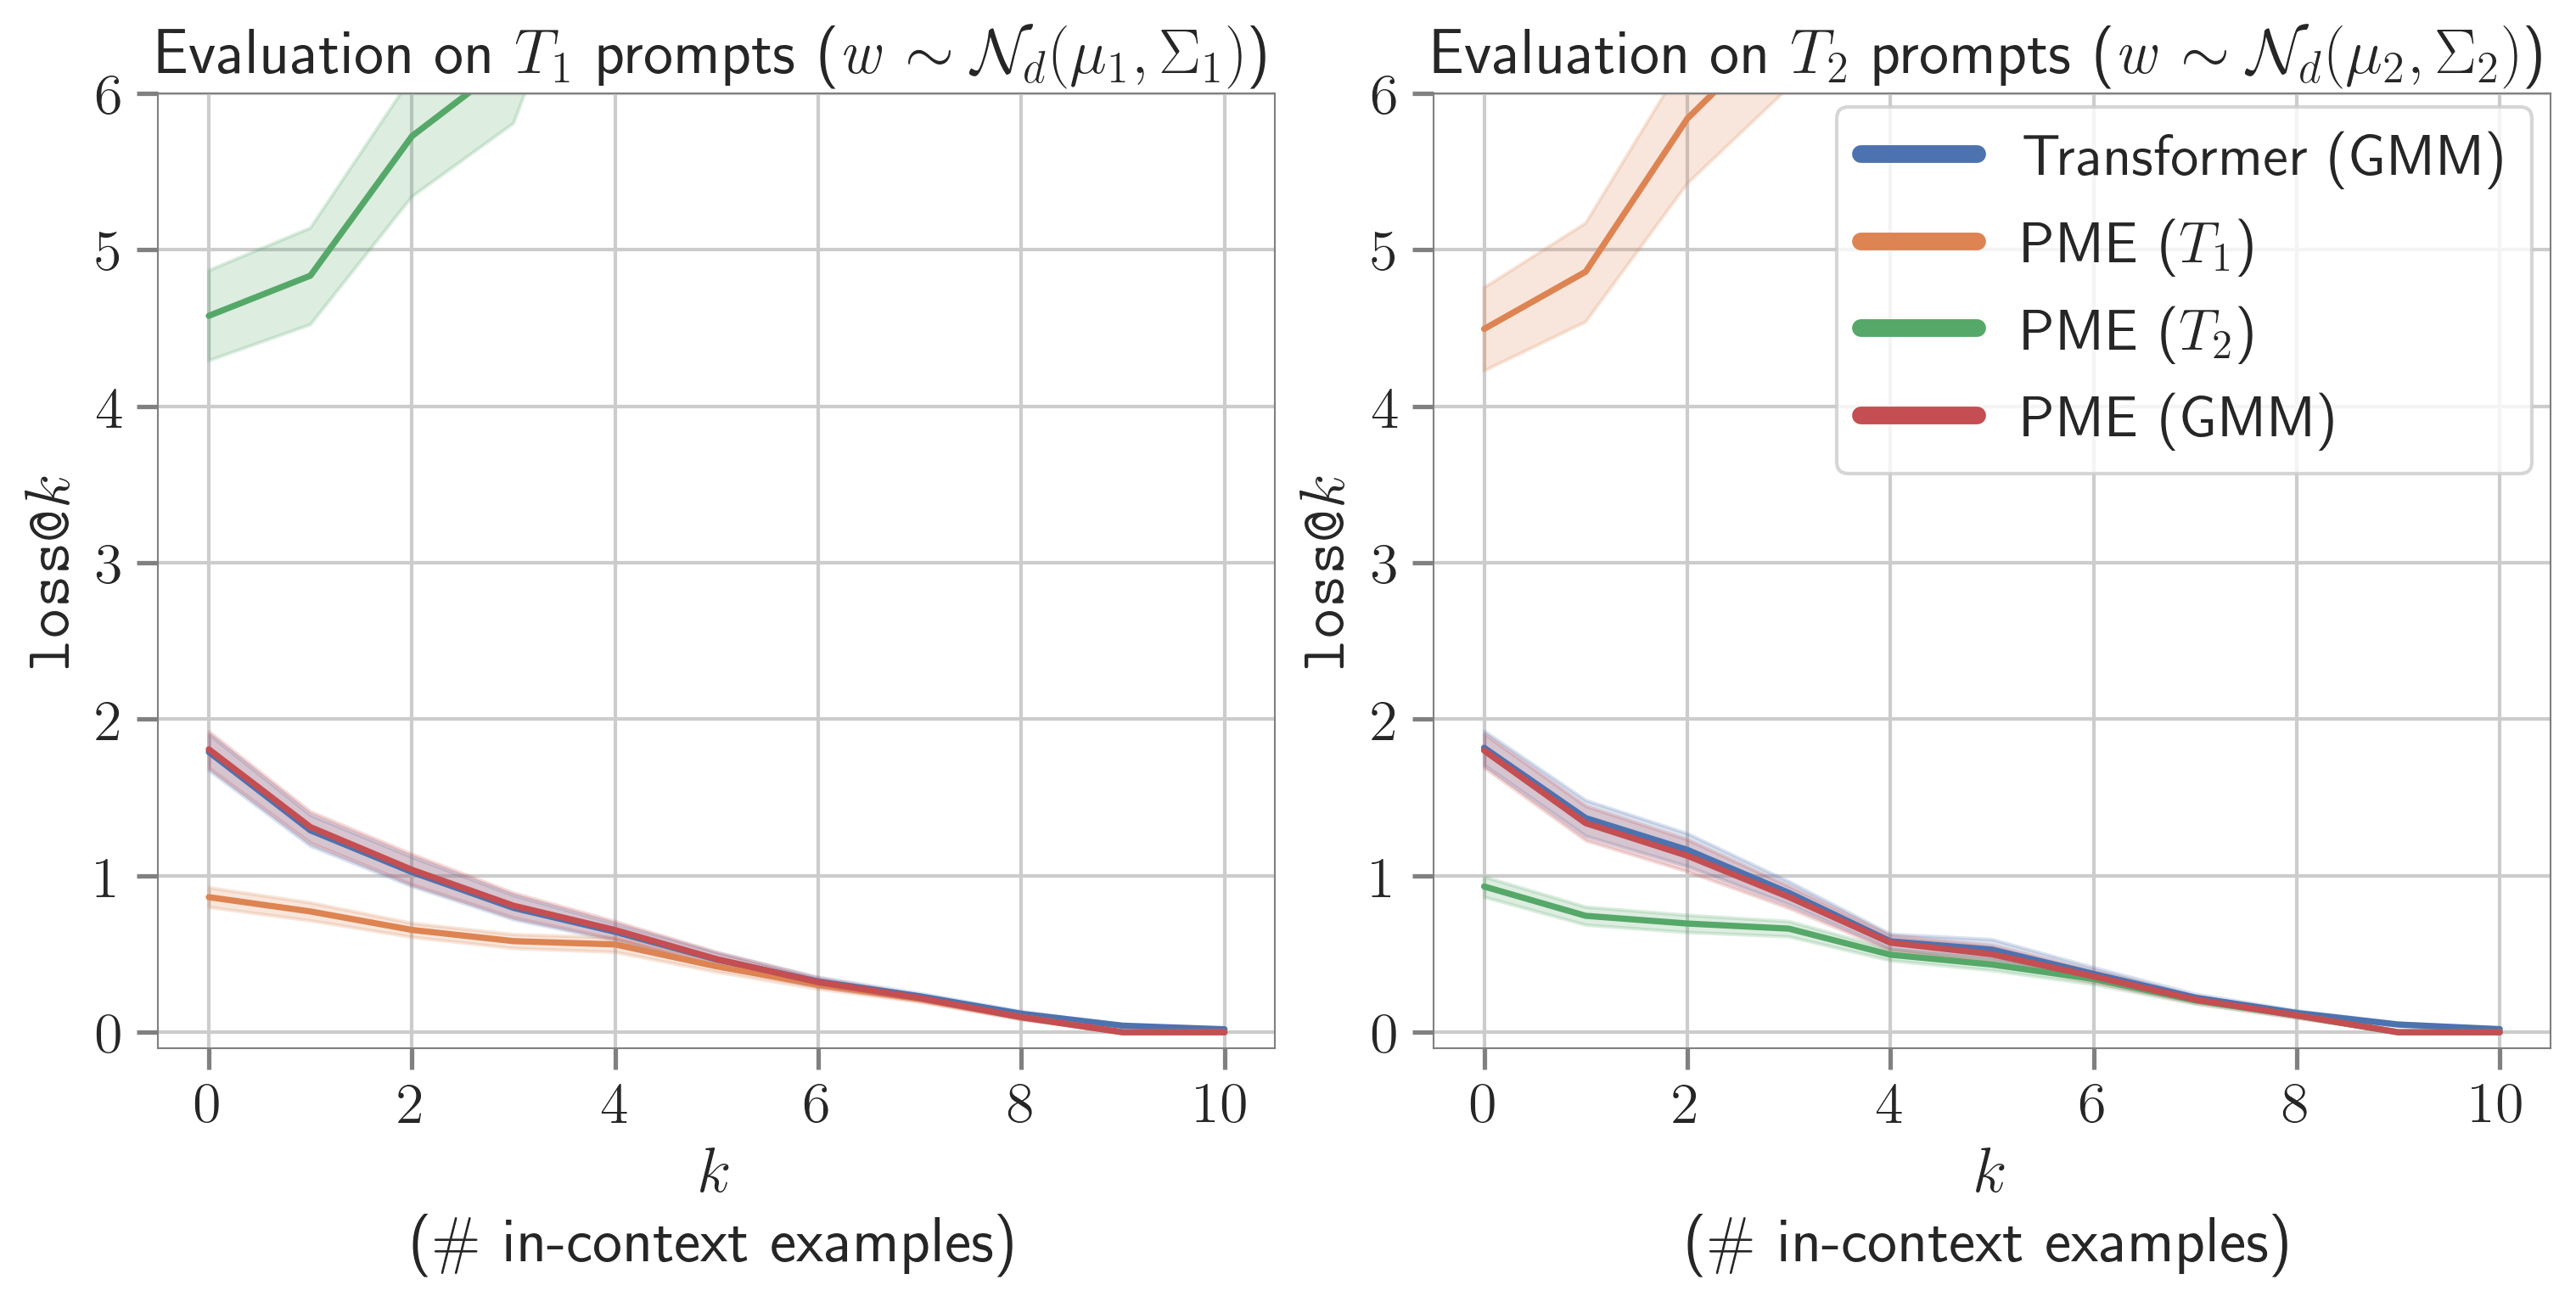

In [5]:
dict_to_pickle = {"transformer_loss_no_mean_t1": transformer_loss_no_mean_t1,
    "t1_errors_batch_no_mean_t1": t1_errors_batch_no_mean_t1,
    "t2_errors_batch_no_mean_t1": t2_errors_batch_no_mean_t1,
    "pmix_errors_batch_no_mean_t1": pmix_errors_batch_no_mean_t1,
    "transformer_loss_no_mean_t2": transformer_loss_no_mean_t2,
    "t1_errors_batch_no_mean_t2":  t1_errors_batch_no_mean_t2,
    "t2_errors_batch_no_mean_t2":  t2_errors_batch_no_mean_t2,
    "pmix_errors_batch_no_mean_t2": pmix_errors_batch_no_mean_t2,}

sns_lineplot_paper(xs, 
                   n_dims, 
                   
                   plot_tsr = {
                       "ax1": [(transformer_loss_no_mean_t1, "Transformer (GMM)"),
                                (t1_errors_batch_no_mean_t1, "PME ($T_1$)"),
                                (t2_errors_batch_no_mean_t1, "PME ($T_2$)"),
                                (pmix_errors_batch_no_mean_t1, "PME (GMM)")],
                        "ax2": [(transformer_loss_no_mean_t2, "Transformer (GMM)"),
                                (t1_errors_batch_no_mean_t2, "PME ($T_1$)"),
                                (t2_errors_batch_no_mean_t2, "PME ($T_2$)"),
                                (pmix_errors_batch_no_mean_t2, "PME (GMM)")]
                   },
                   plot_suffix = "sq_error",
                   save_filename=save_filename,
                   dict_to_pickle=dict_to_pickle,
                  ylim_ax=6,
                  legend_pos=(1.0, 0.95))

### Plotting evolution of beta1, beta2, pme t1, pme t2, pme mix, ptp t1, ptp t2, 

In [ ]:
# beta1 -- beta1_t1, beta1_t2
# beta2 -- beta2_t1, beta2_t2
# pme t1 -- pme_t1_t1, pme_t1_t2
# pme t2 -- pme_t2_t1, pme_t2_t2
# pme mix -- pme_mix_t1, pme_mix_t2
# ptp t1 -- t1_ptp_batch_t1, t1_ptp_batch_t2
# ptp t2 -- t2_ptp_batch_t1, t2_ptp_batch_t2

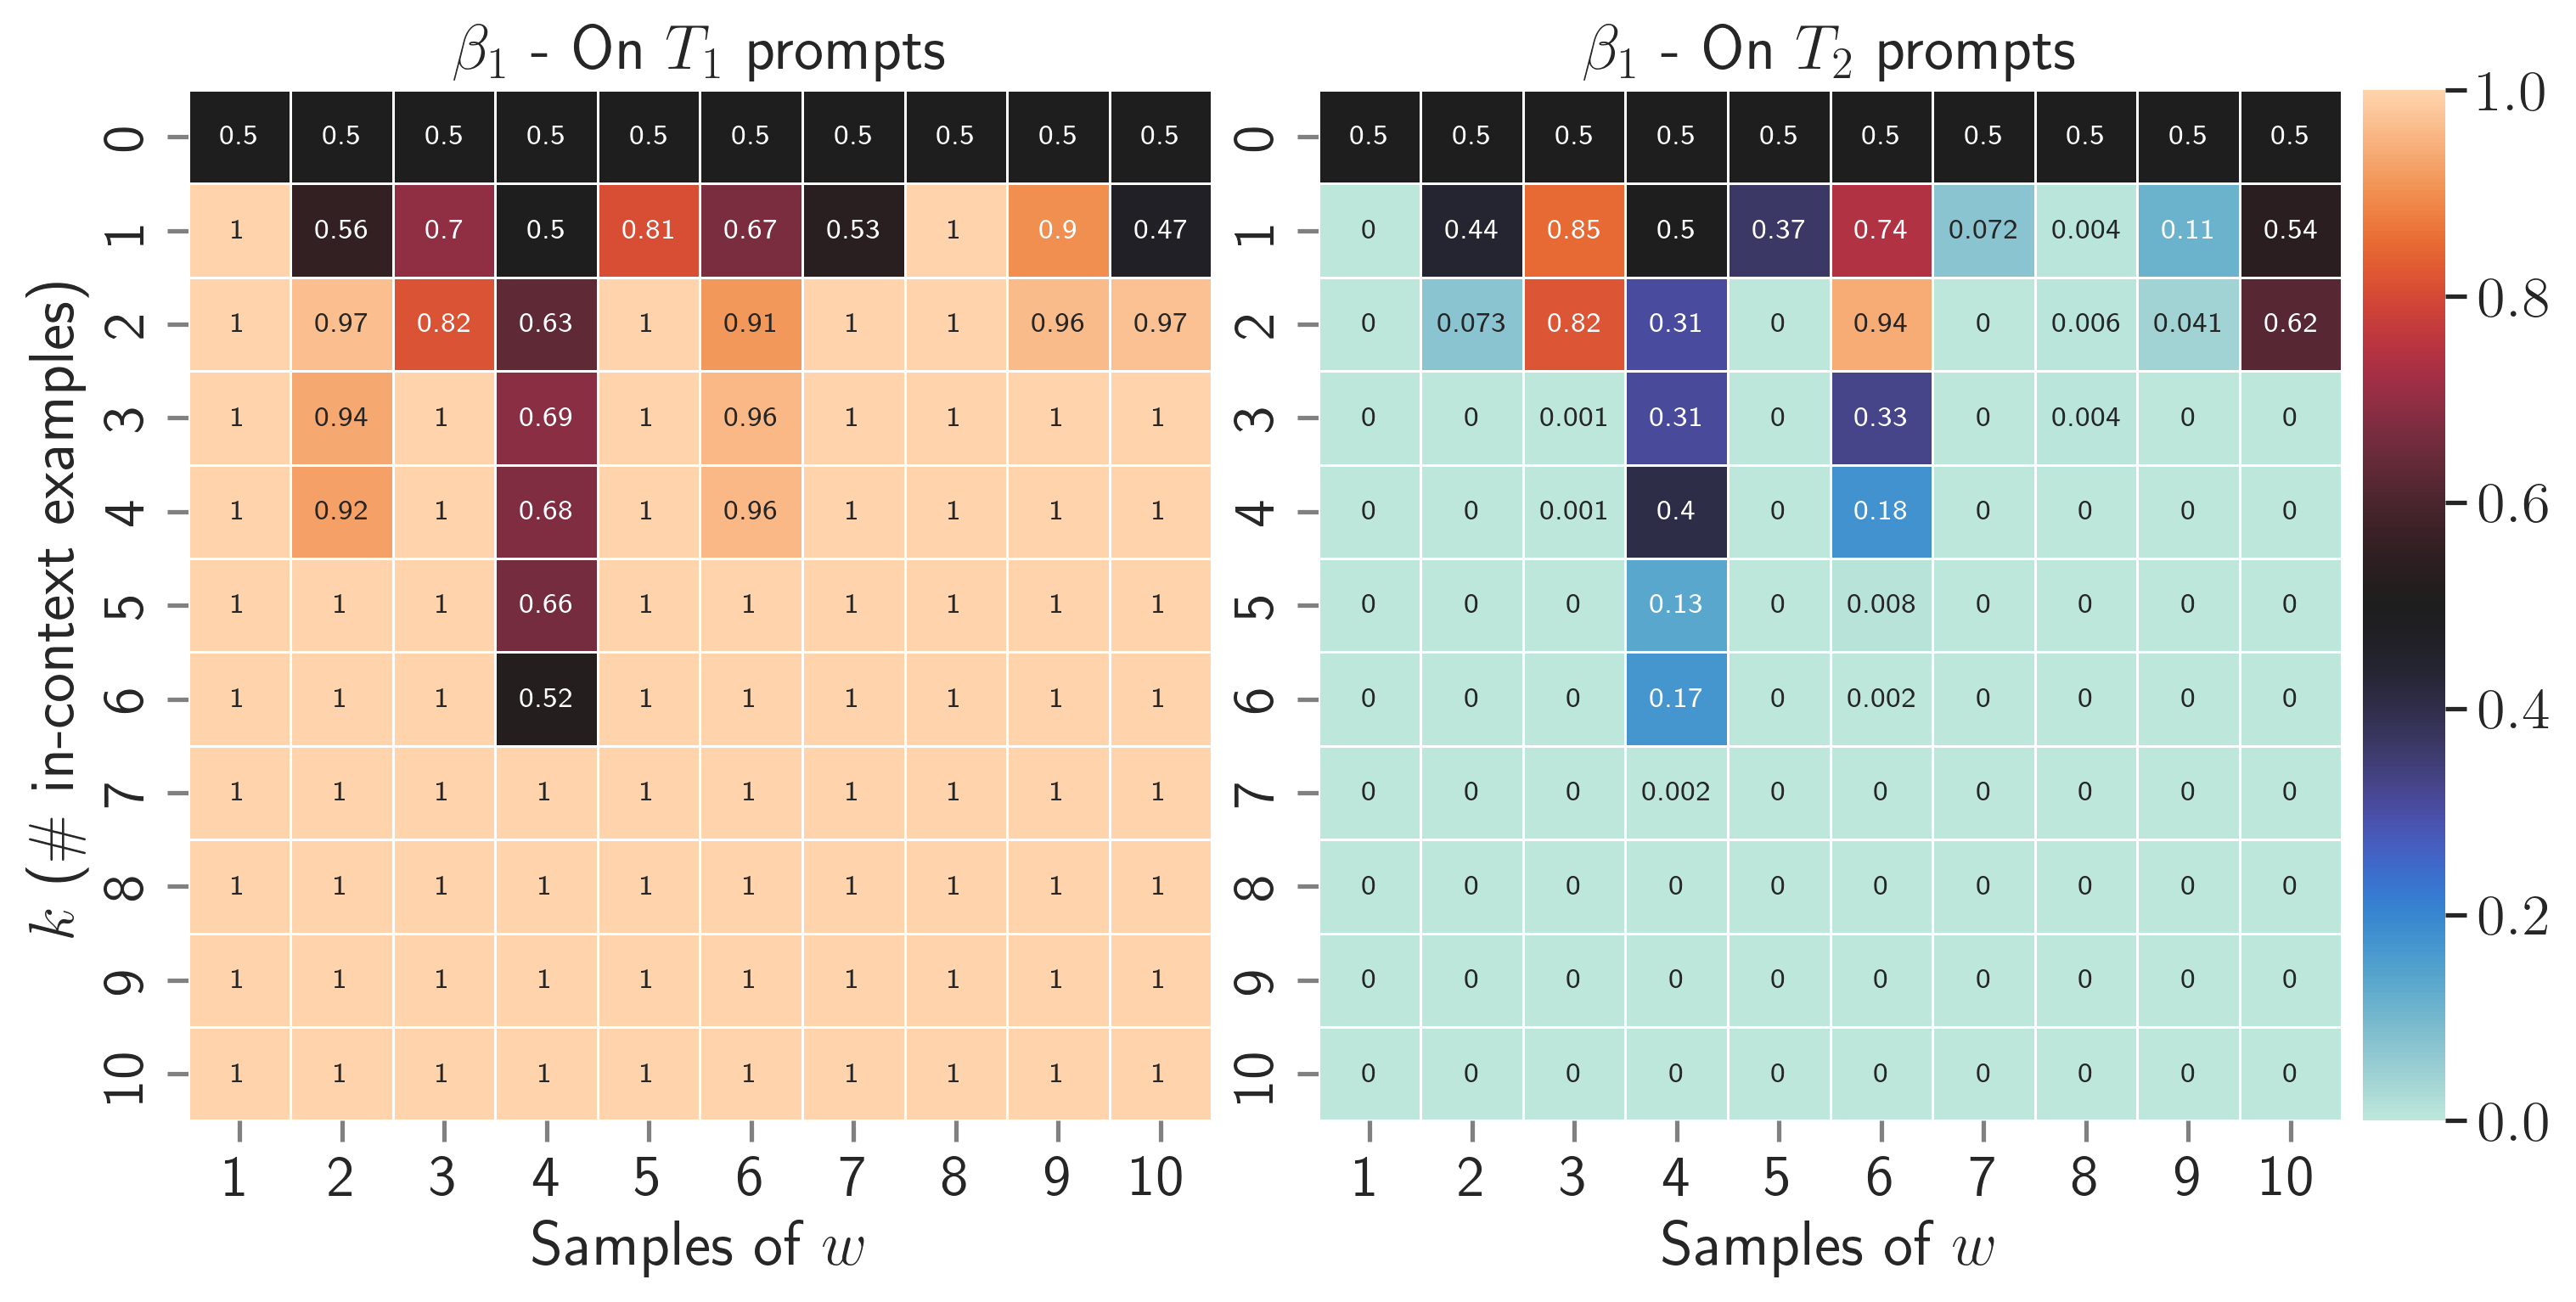

In [6]:
dict_to_pickle = {"beta1_t1": beta1_t1,
    "beta1_t2": beta1_t2,}
sns_plot_evolution_heatmap(xs,
                           cbar_lims = [0, 1],
                           plot_tsr_1=beta1_t1, 
                           plot_tsr_2=beta1_t2,
                           title_plot_1="$\\beta_1$ - On $T_1$ prompts",
                           title_plot_2="$\\beta_1$ - On $T_2$ prompts",
                           plot_suffix = "evln_beta1",
                           save_filename=save_filename,
                           dict_to_pickle=dict_to_pickle,
                          annot=[True, True],
                          annot_sizes=[8,8])

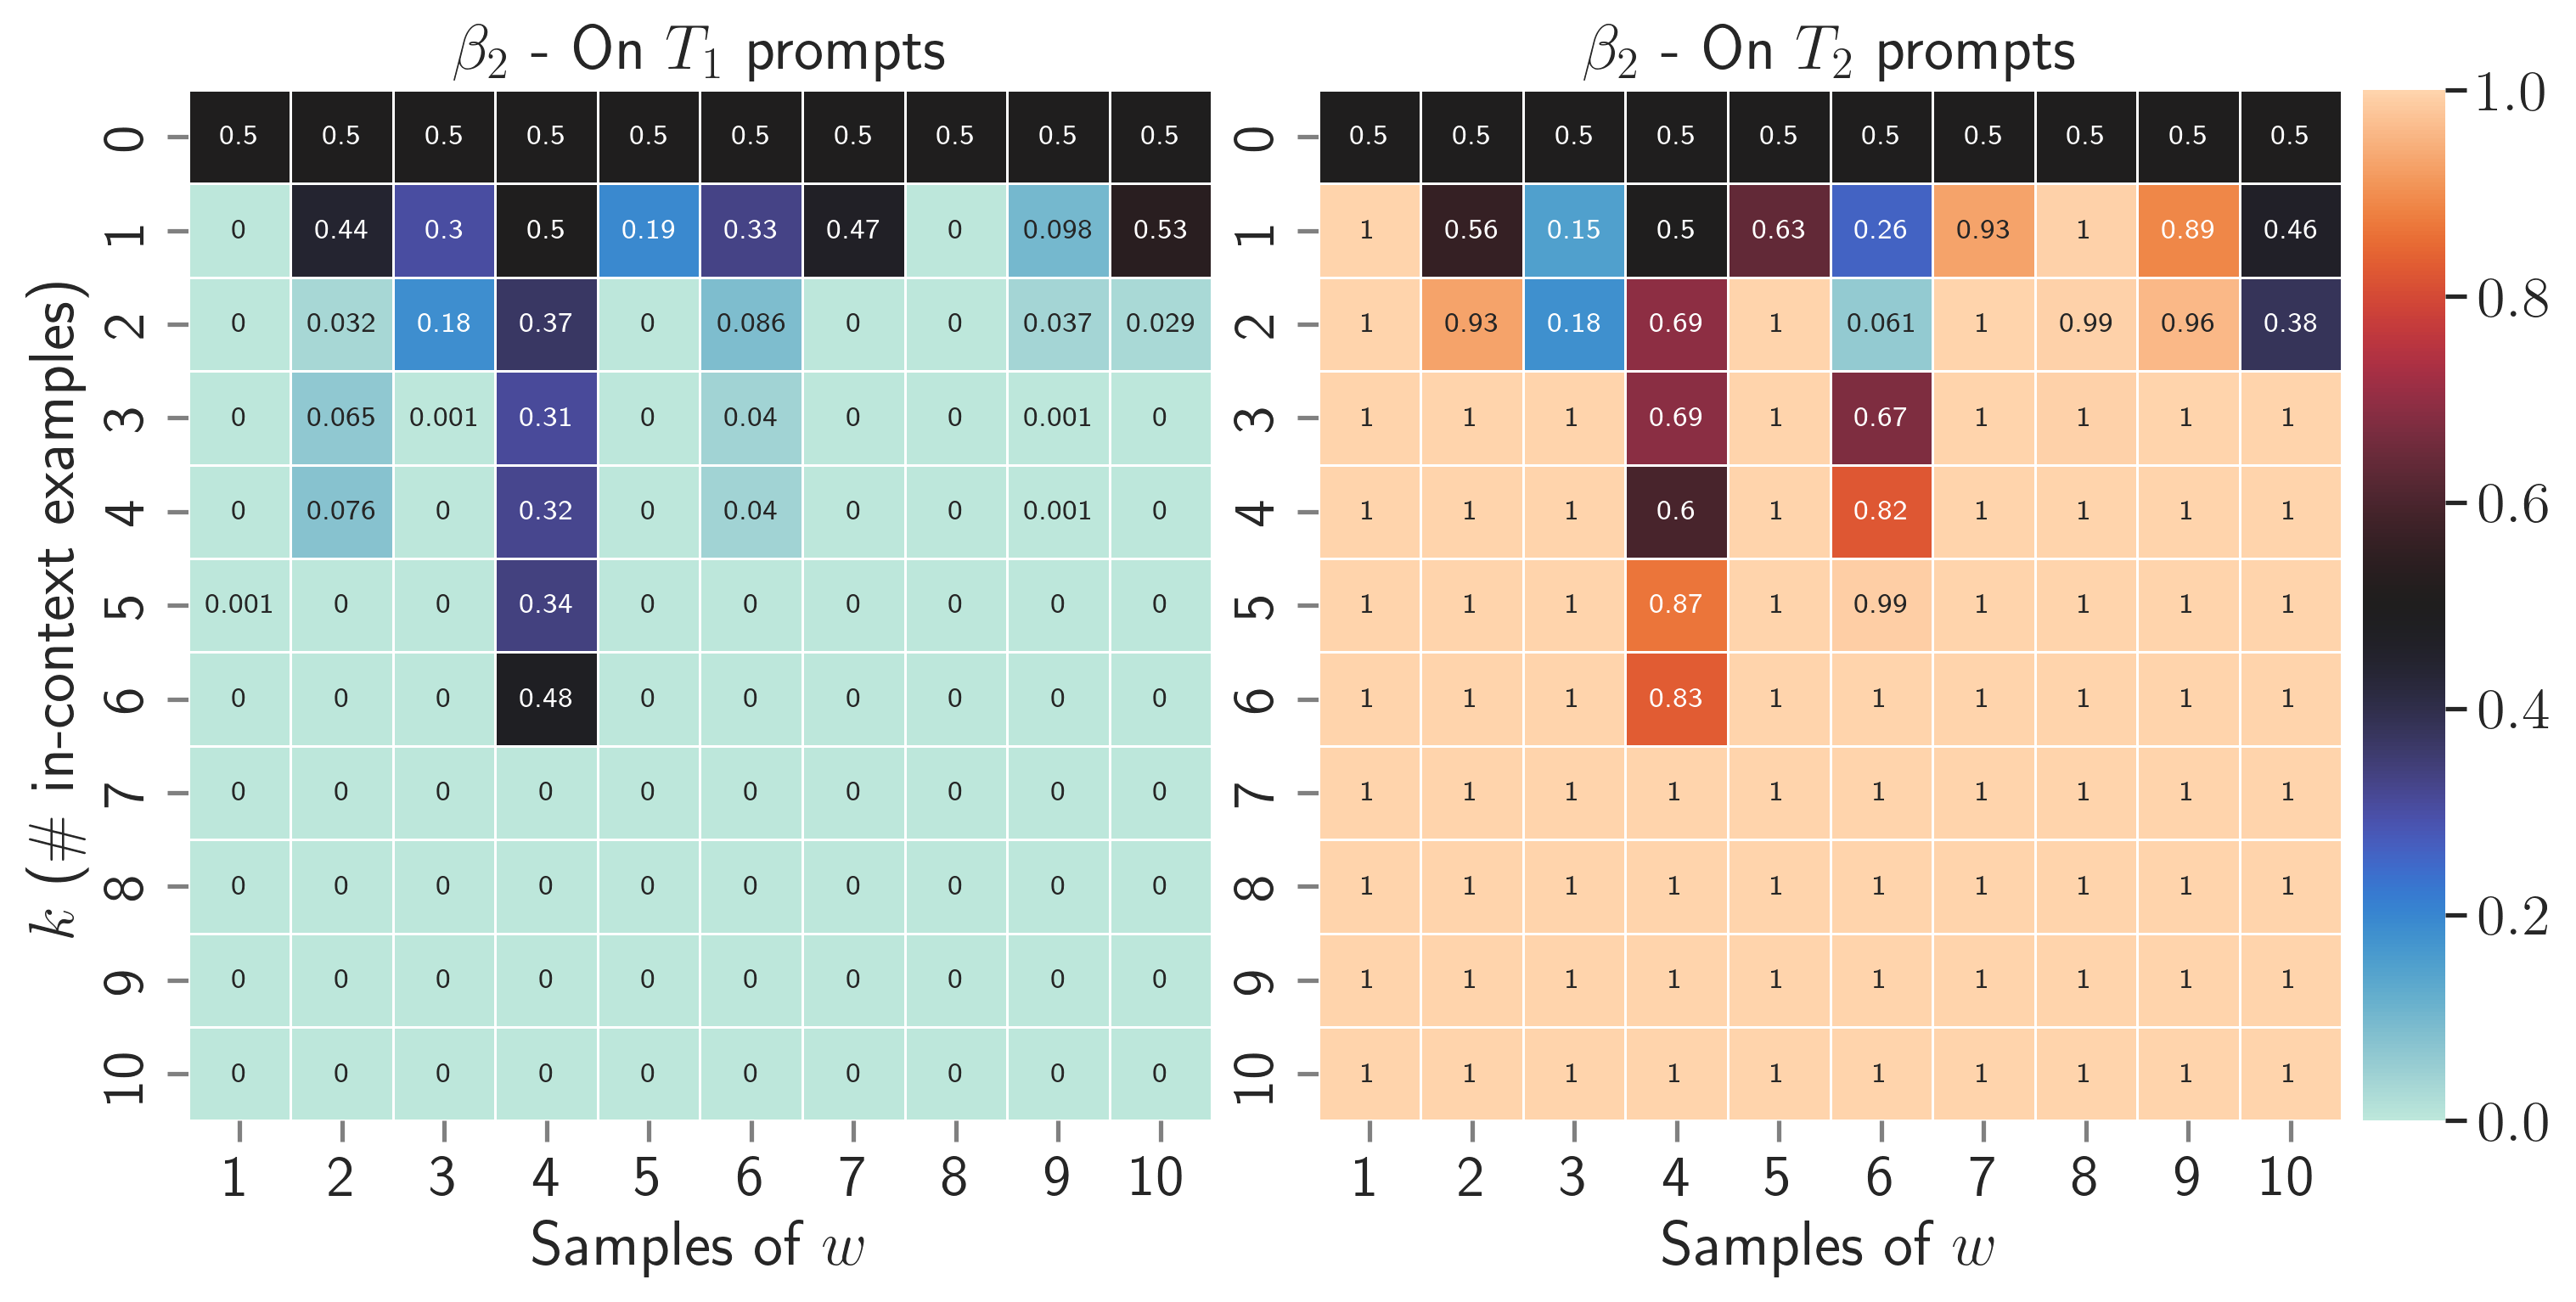

In [7]:
dict_to_pickle = {"beta2_t1": beta2_t1,
    "beta2_t2": beta2_t2,}
sns_plot_evolution_heatmap(xs,
                           cbar_lims = [0, 1],
                           plot_tsr_1=beta2_t1, 
                           plot_tsr_2=beta2_t2,
                           title_plot_1="$\\beta_2$ - On $T_1$ prompts",
                           title_plot_2="$\\beta_2$ - On $T_2$ prompts",
                           plot_suffix = "evln_beta2",
                           save_filename=save_filename,
                           dict_to_pickle=dict_to_pickle,
                          annot=[True, True],
                          annot_sizes=[8,8])

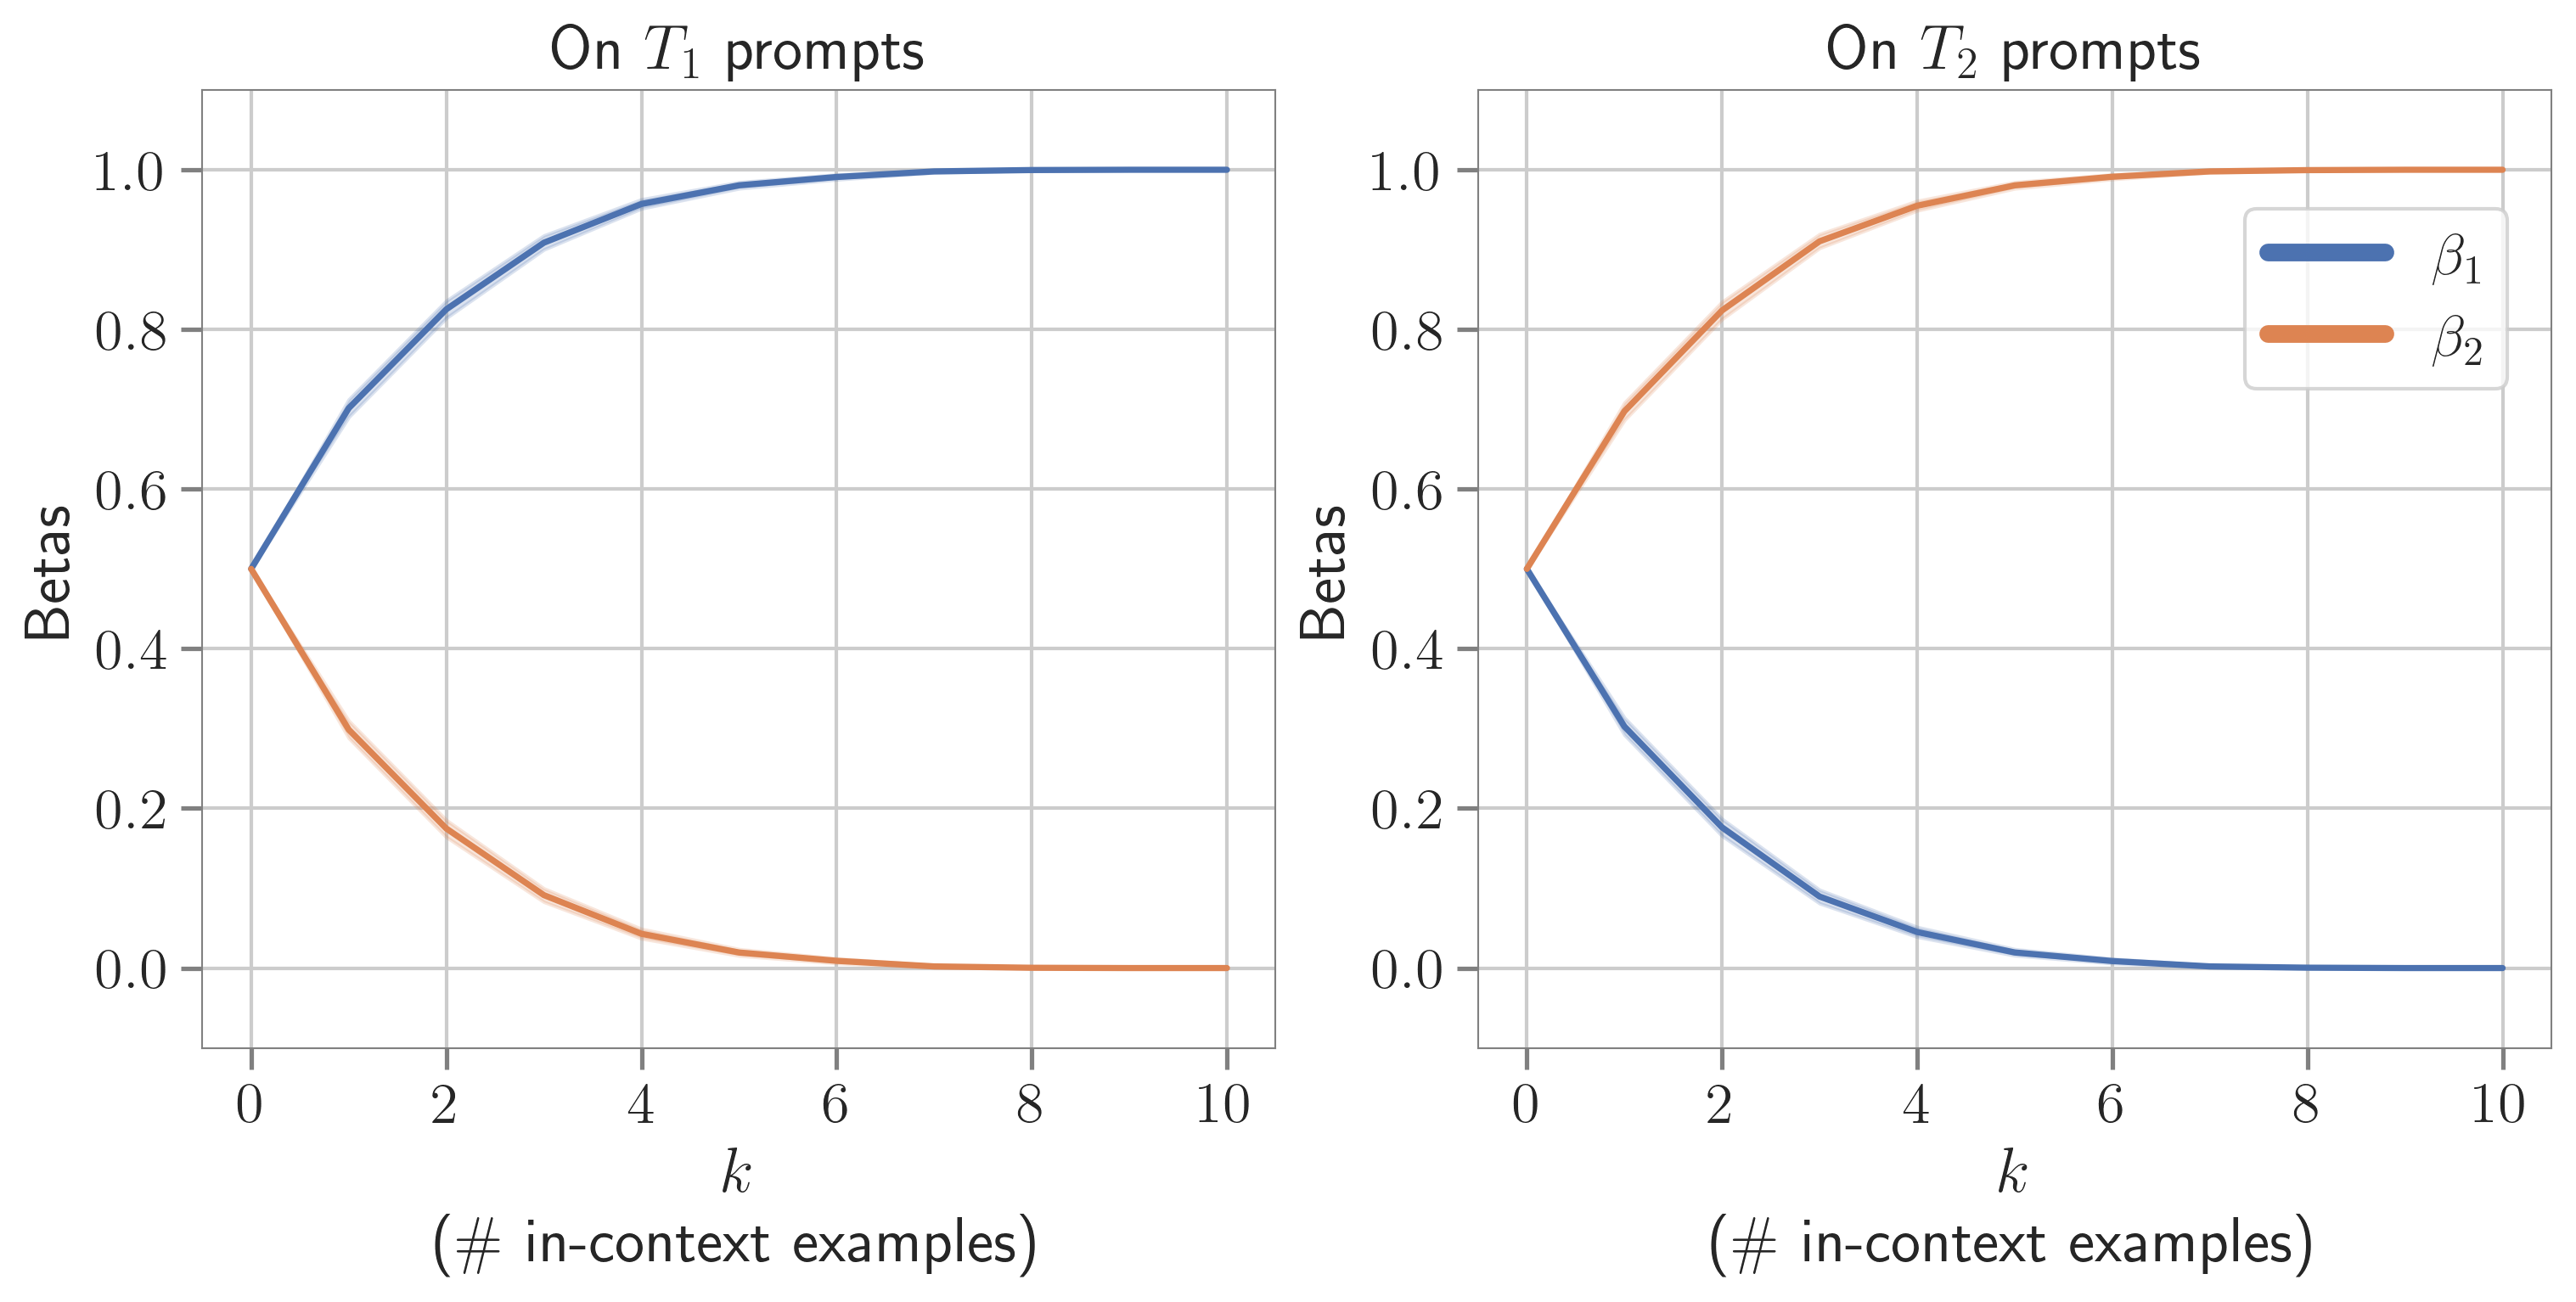

In [8]:
# Lineplot Betas
dict_to_pickle = {"beta1_t1": beta1_t1,
                "beta1_t2": beta1_t2,
                "beta2_t1": beta2_t1,
                "beta2_t2": beta2_t2,}

sns_lineplot_paper_evolution(xs, 
                   n_dims, 
                   
                   plot_tsr = {
                       # On T1 prompts
                       "ax1": [(beta1_t1, "$\\beta_1$"),
                                (beta2_t1, "$\\beta_2$")],
                        "ax2": [(beta1_t2, "$\\beta_1$"),
                                (beta2_t2, "$\\beta_2$")]
                   },
                   plot_suffix = "evln_betas_lineplot",
                   save_filename=save_filename,
                   dict_to_pickle=dict_to_pickle,
                    ylabel="Betas",
                    ylim_ax=(-0.1, 1.1),
                    legend_pos=(0.99, 0.87))

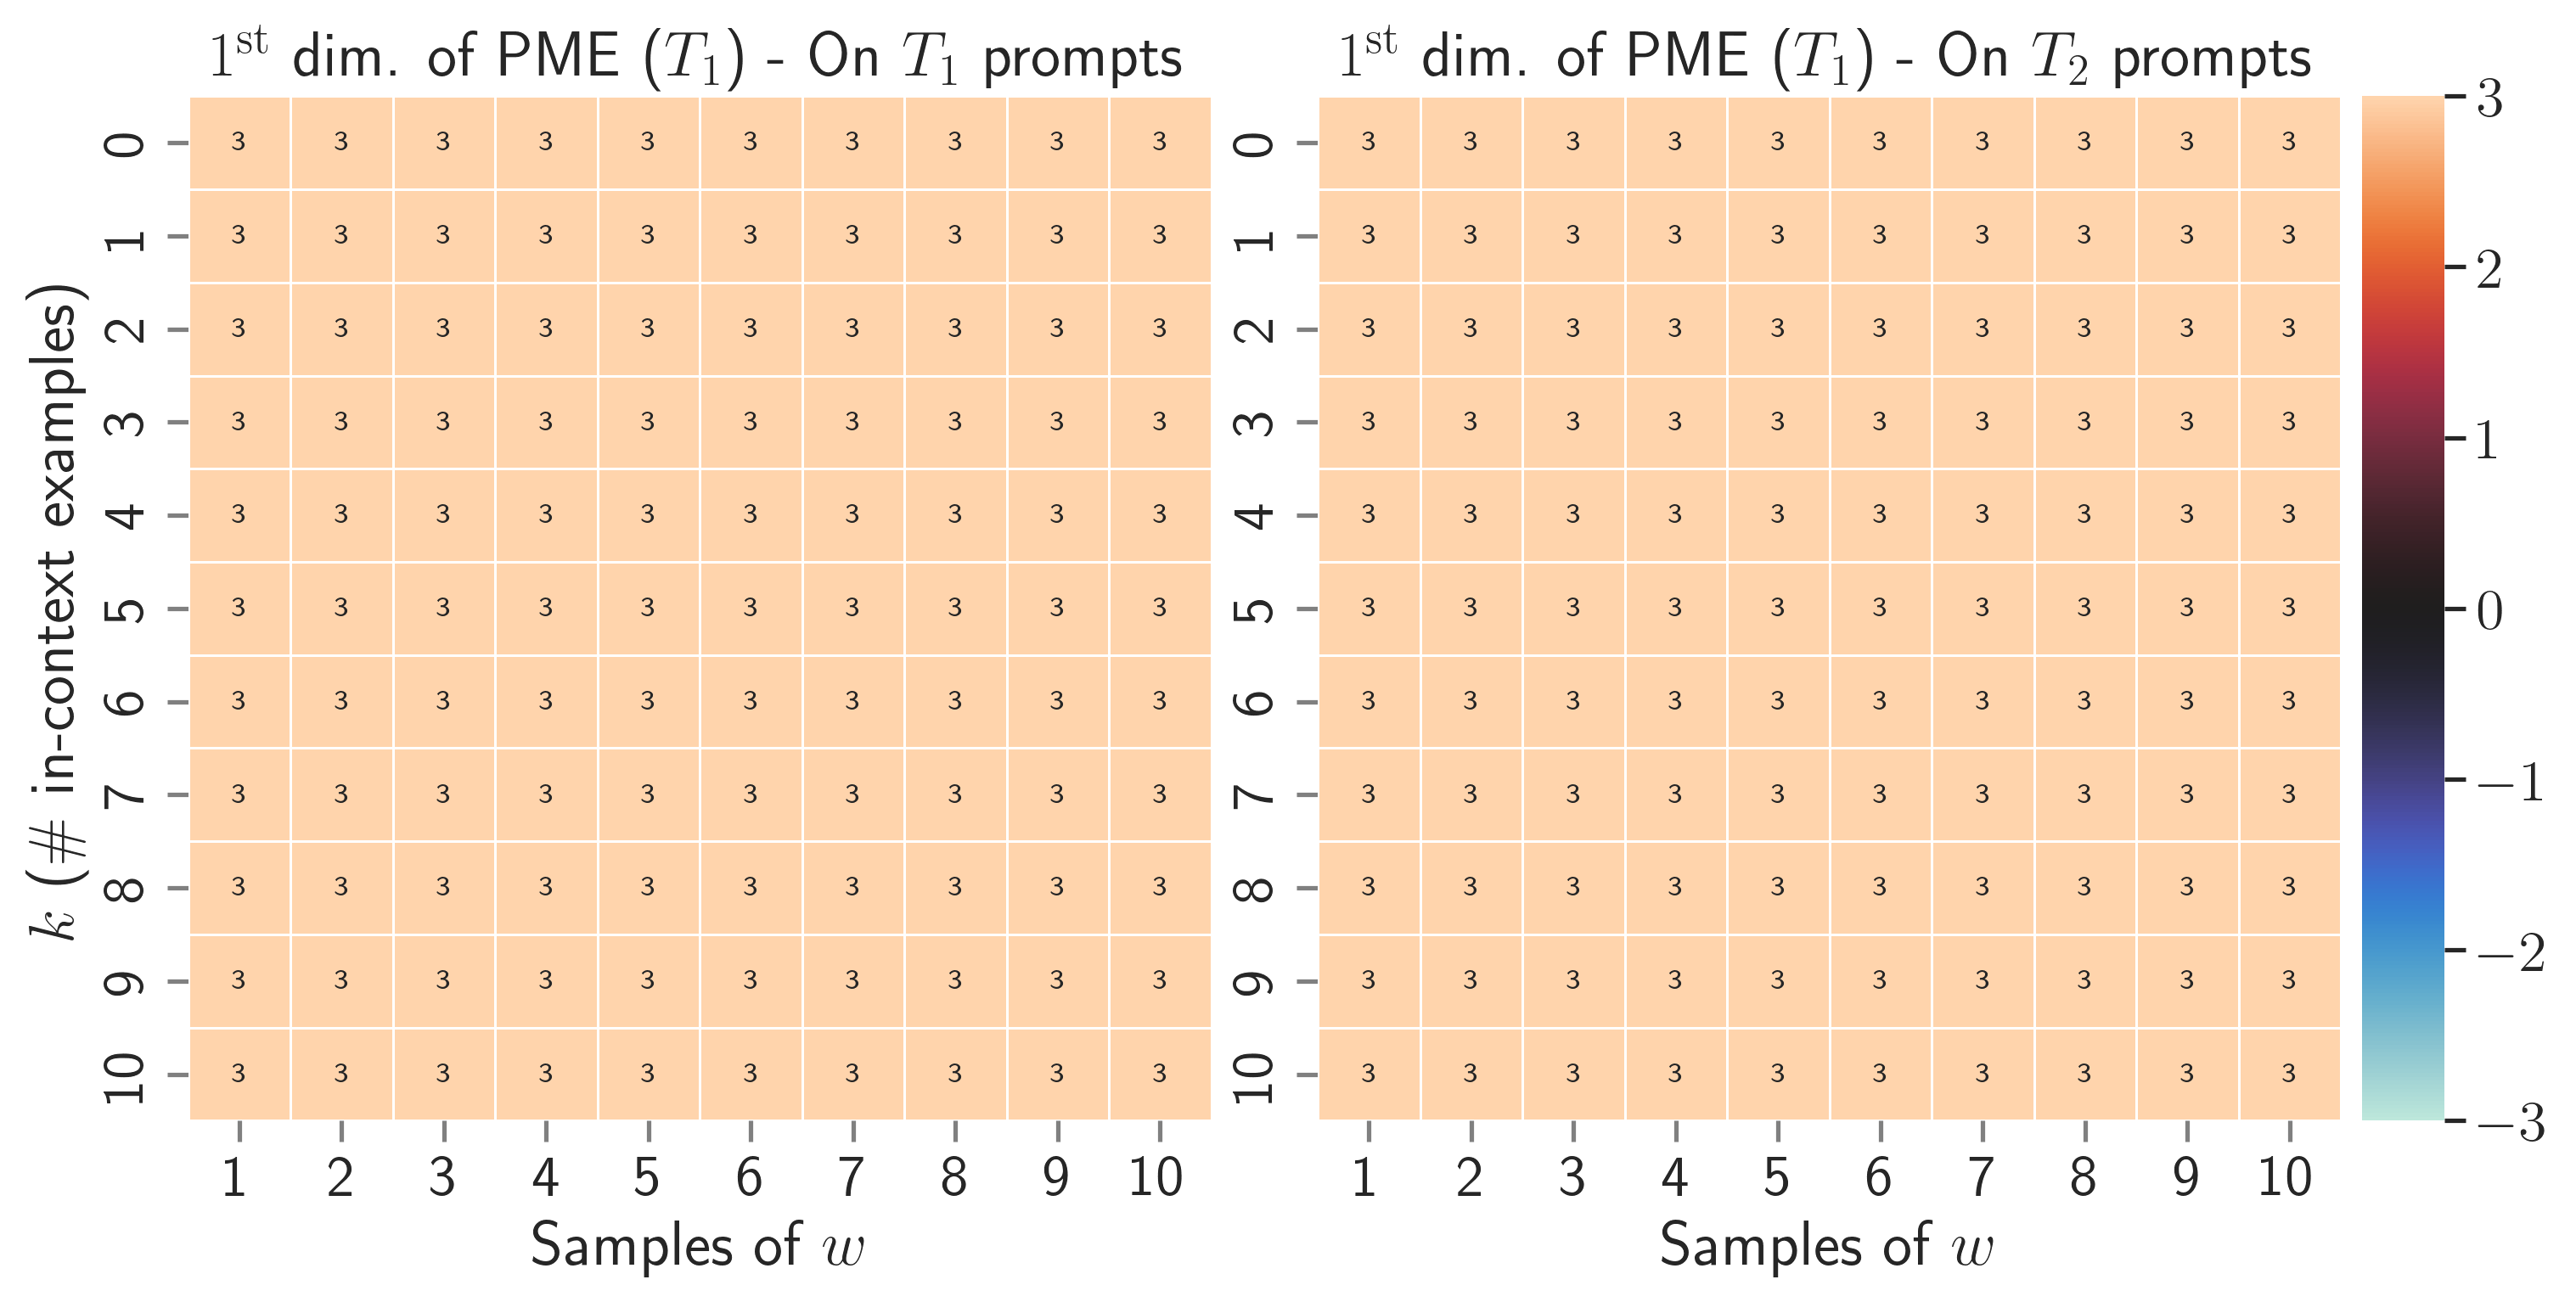

In [9]:
# pme_t1
# pme_t1_t1, pme_t1_t2
# pme_t1[:,:,0]
dict_to_pickle = {"pme_t1_t1": pme_t1_t1,
    "pme_t1_t2": pme_t1_t2,}
sns_plot_evolution_heatmap(xs,
                           cbar_lims = [-3, 3],
                           plot_tsr_1=pme_t1_t1[:,:,0], 
                           plot_tsr_2=pme_t1_t2[:,:,0],
                           title_plot_1="$1^\mathrm{st}$ dim. of PME ($T_1$) - On $T_1$ prompts",
                           title_plot_2="$1^\mathrm{st}$ dim. of PME ($T_1$) - On $T_2$ prompts",
                           plot_suffix = "evln_pme_t1",
                           save_filename=save_filename,
                           dict_to_pickle=dict_to_pickle,
                           annot=[True, True],
                          annot_sizes=[8,8])

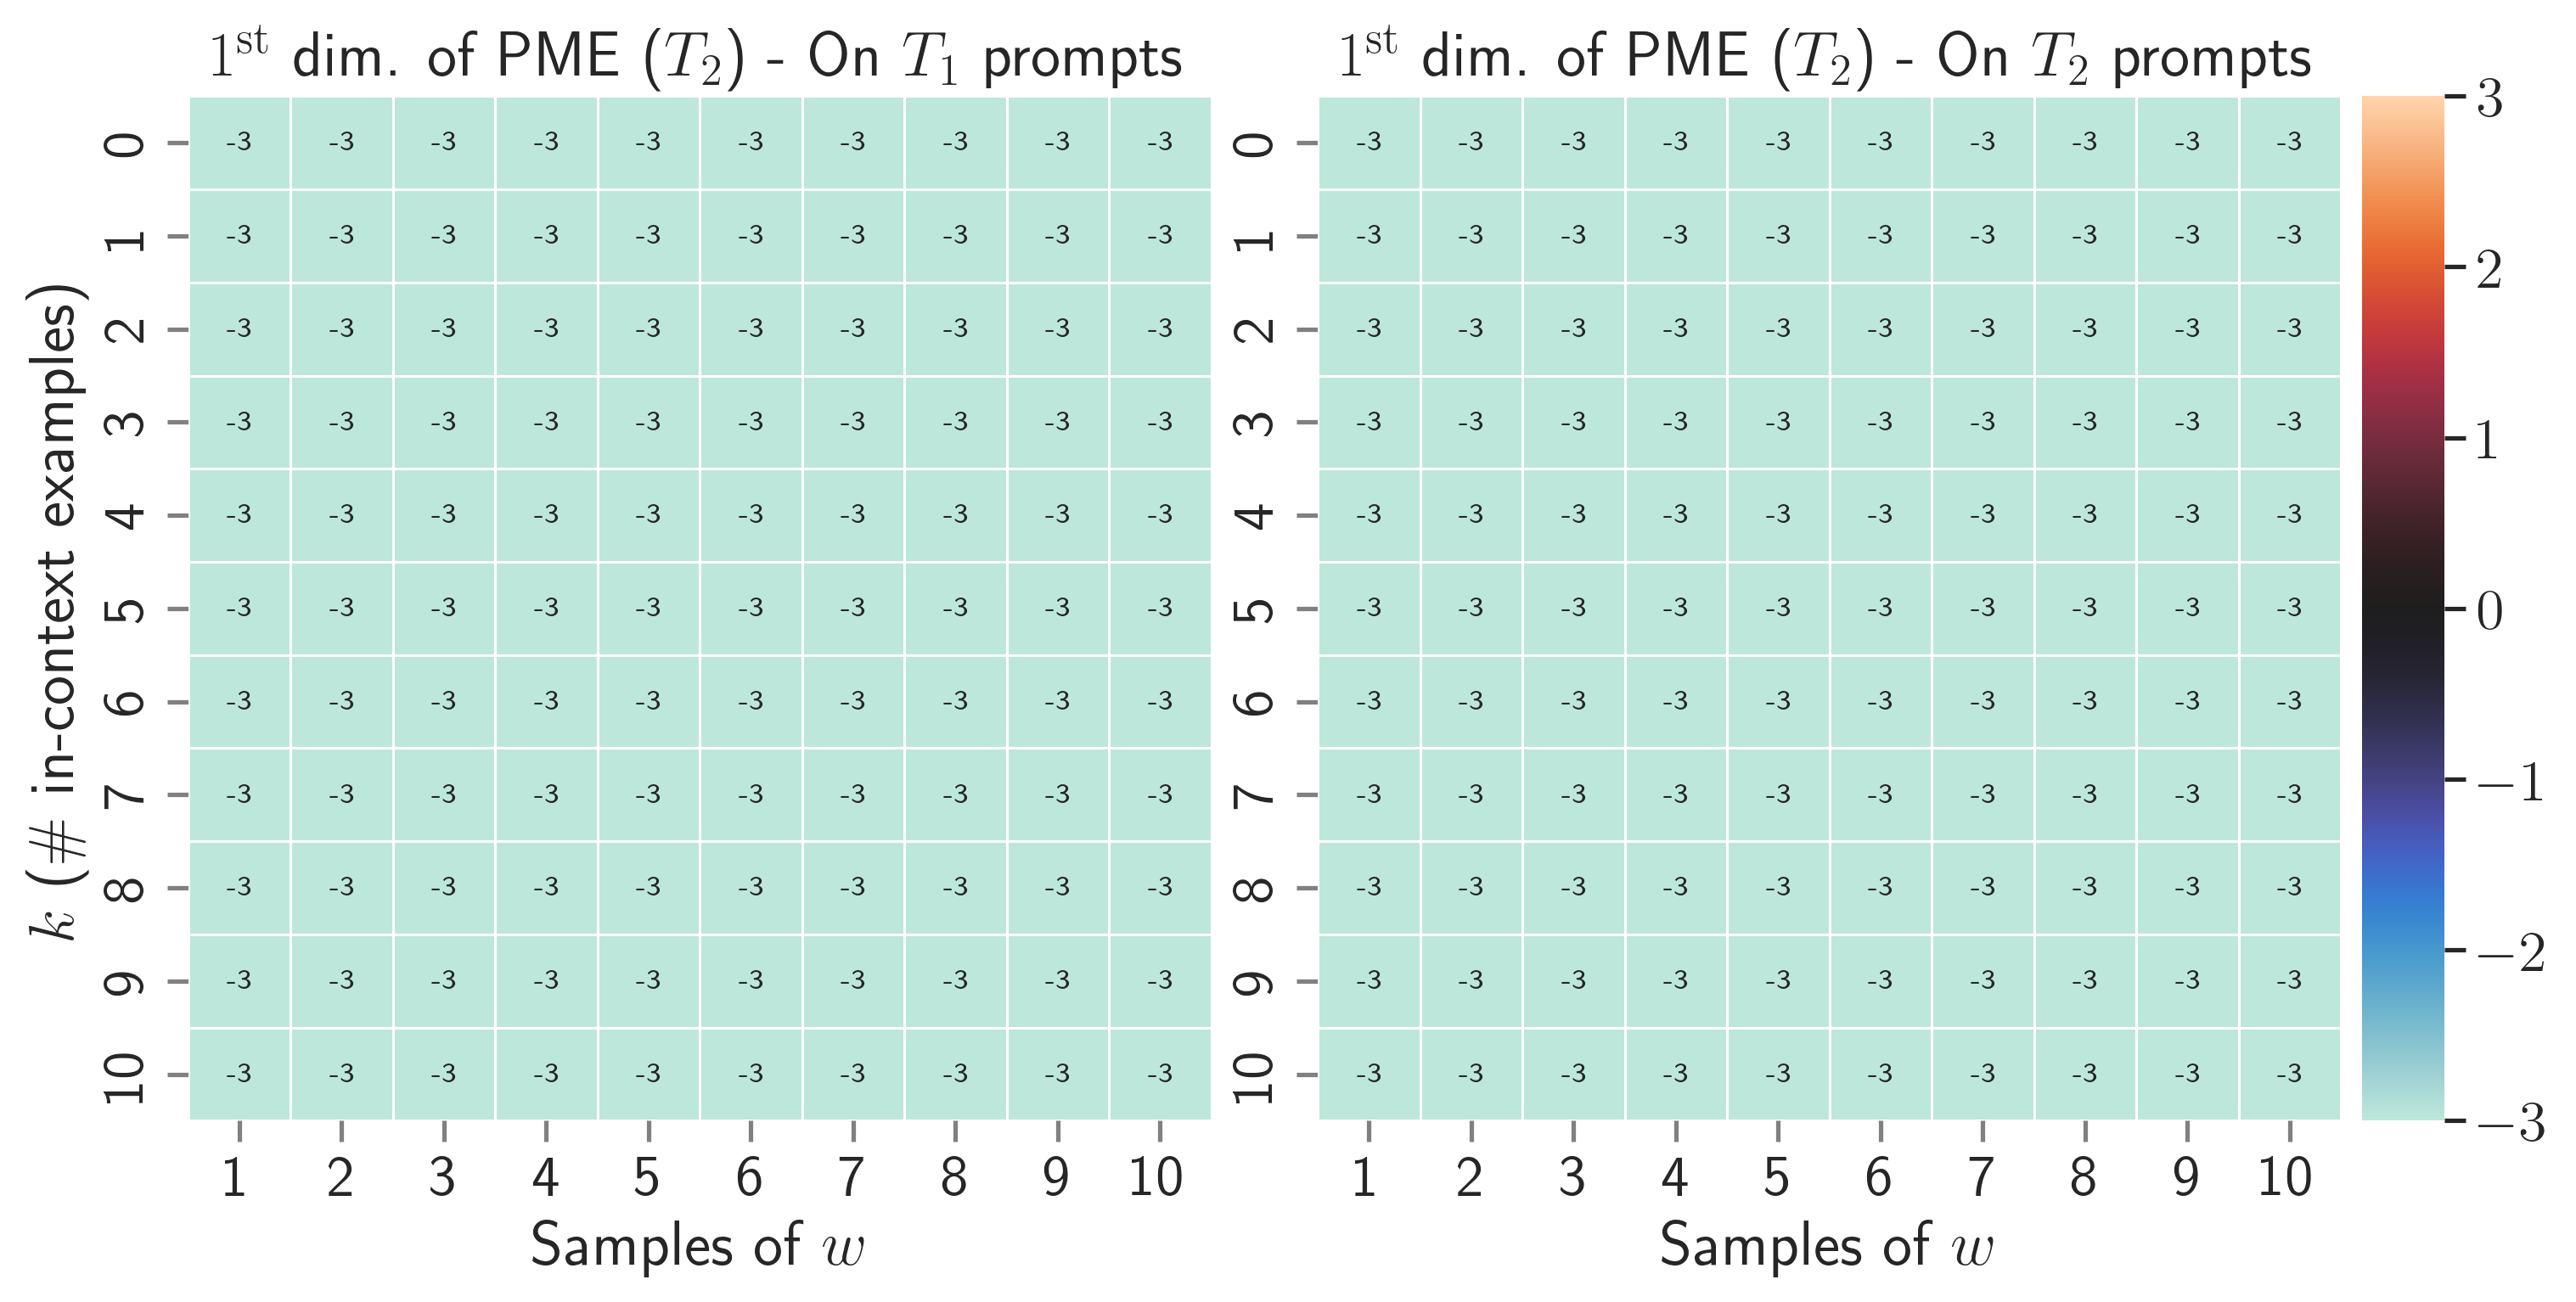

In [10]:
# pme_t2
# pme_t2_t1, pme_t2_t2
# pme_t2[:,:,0]
dict_to_pickle = {"pme_t2_t1": pme_t2_t1,
    "pme_t2_t2": pme_t2_t2,}
sns_plot_evolution_heatmap(xs,
                           cbar_lims = [-3, 3],
                           plot_tsr_1=pme_t2_t1[:,:,0], 
                           plot_tsr_2=pme_t2_t2[:,:,0],
                           title_plot_1="$1^\mathrm{st}$ dim. of PME ($T_2$) - On $T_1$ prompts",
                           title_plot_2="$1^\mathrm{st}$ dim. of PME ($T_2$) - On $T_2$ prompts",
                           plot_suffix = "evln_pme_t2",
                           save_filename=save_filename,
                           dict_to_pickle=dict_to_pickle,
                           annot=[True, True],
                          annot_sizes=[8,8])

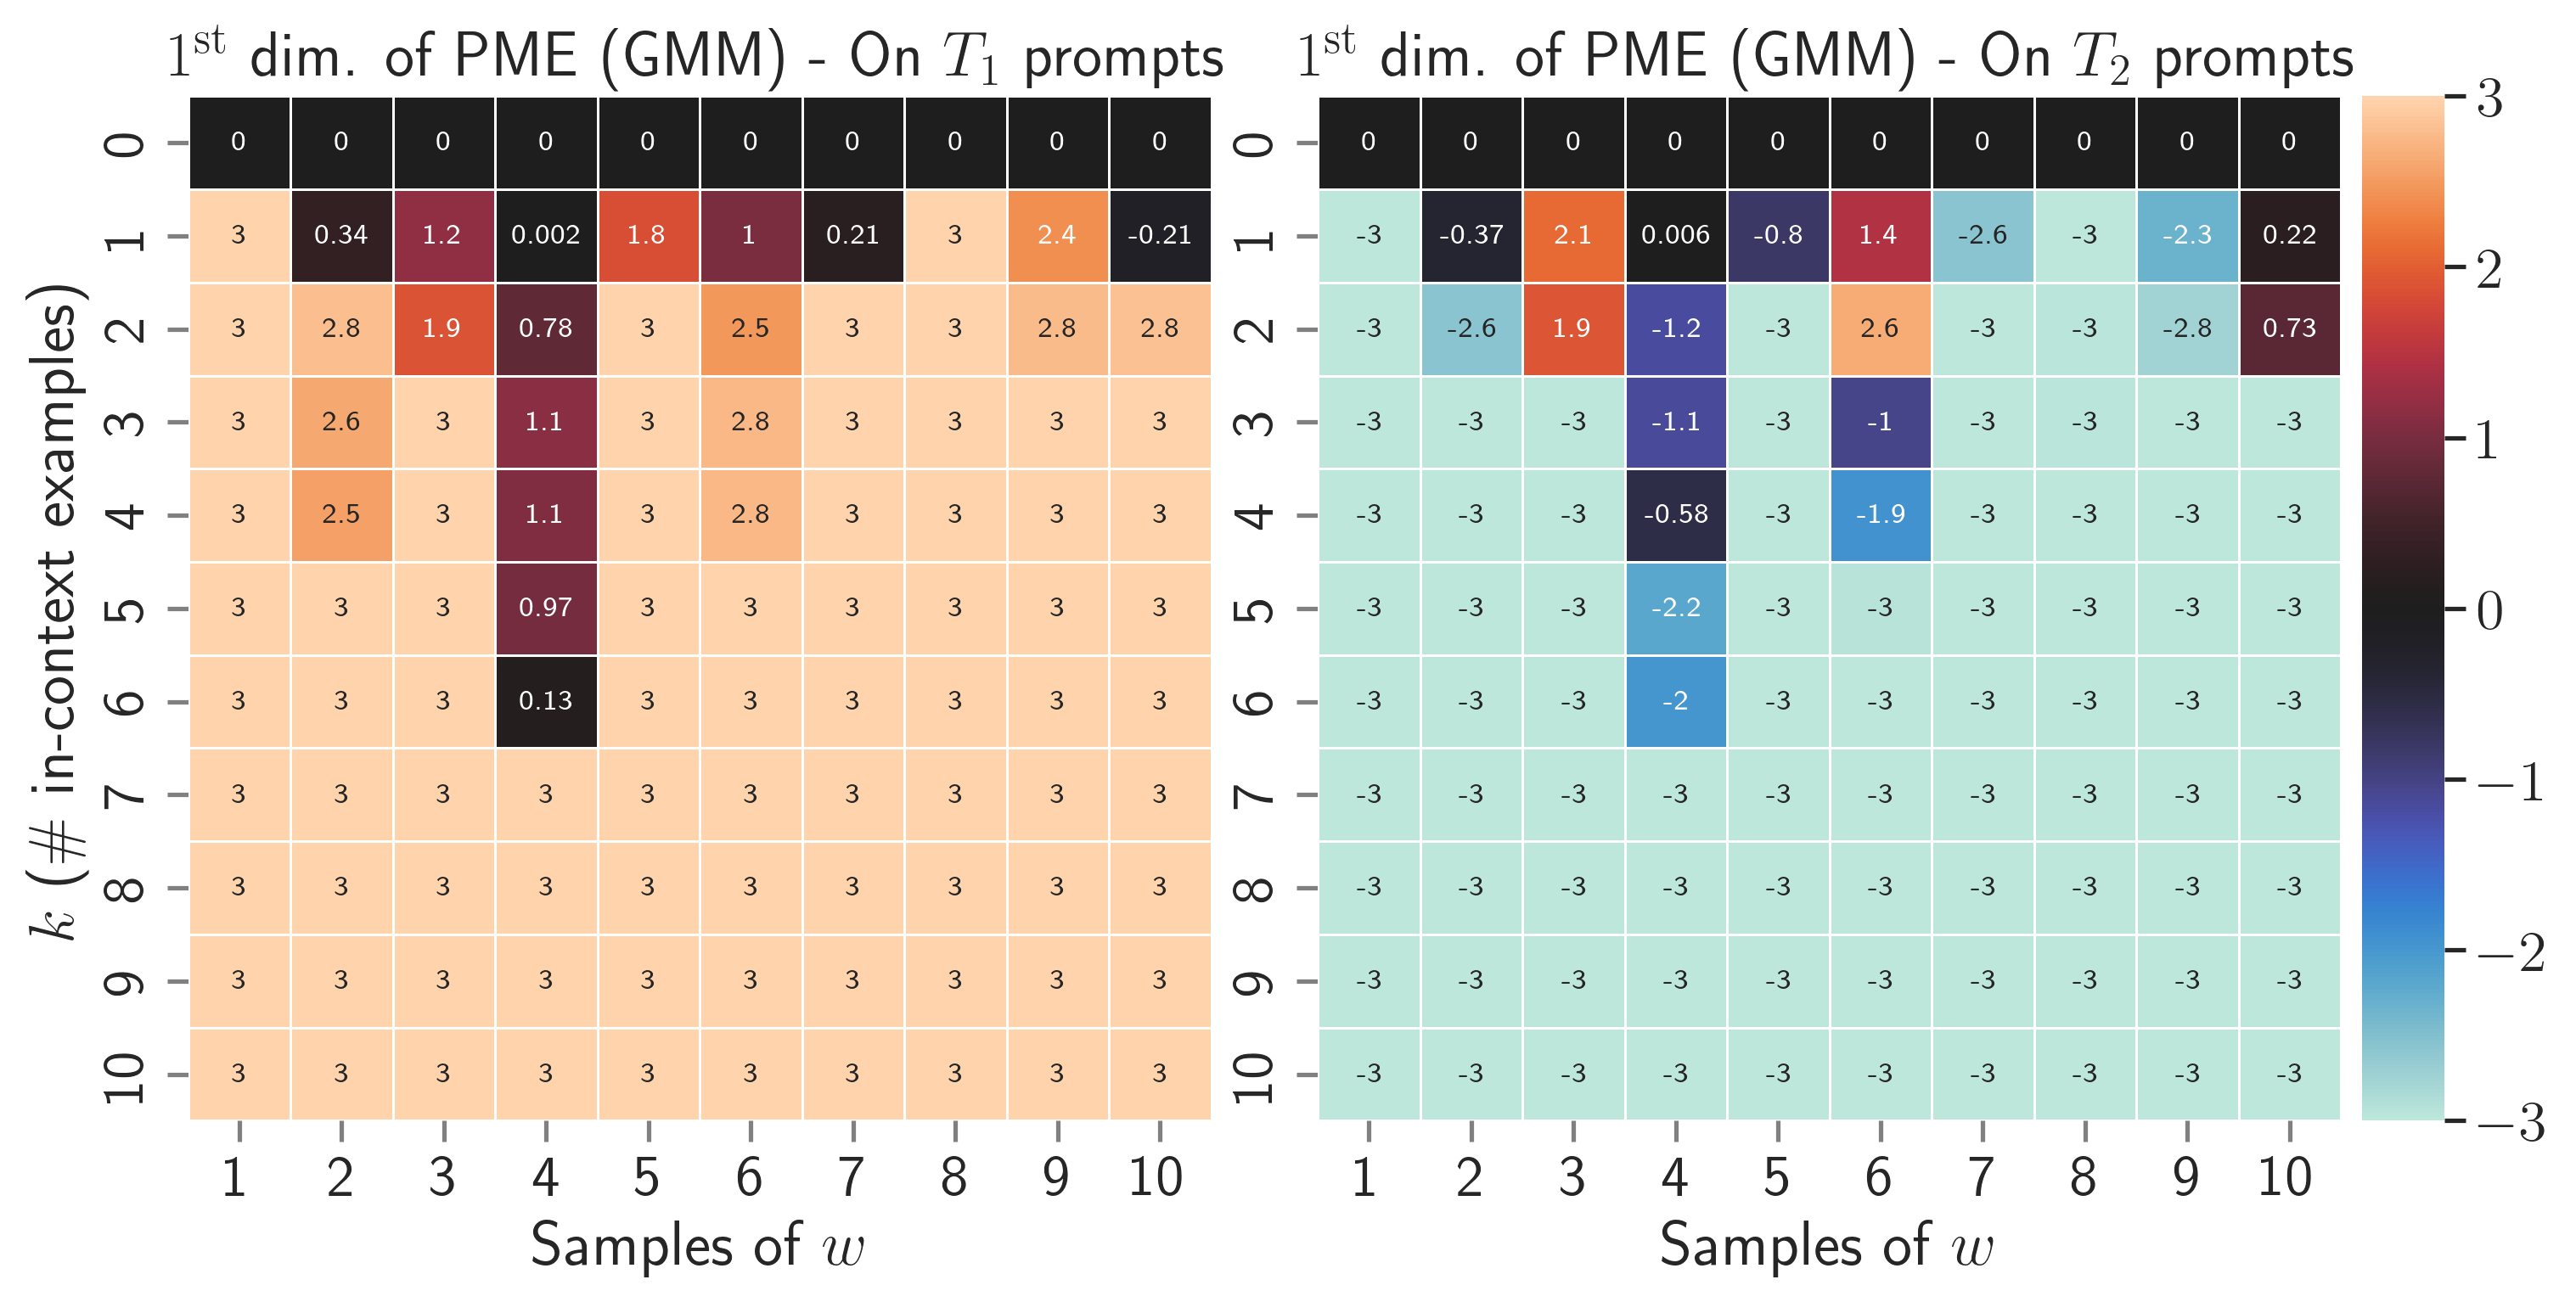

In [11]:
# pme_mix
# pme_mix_t1, pme_mix_t2
# pme_mix[:,:,0]
batch_skip=0
dict_to_pickle = {"pme_mix_t1": pme_mix_t1,
    "pme_mix_t2": pme_mix_t2,}
sns_plot_evolution_heatmap(xs,
                           cbar_lims = [-3, 3],
                           plot_tsr_1=pme_mix_t1[batch_skip:,:,0], 
                           plot_tsr_2=pme_mix_t2[batch_skip:,:,0],
                           title_plot_1="$1^\mathrm{st}$ dim. of PME (GMM) - On $T_1$ prompts",
                           title_plot_2="$1^\mathrm{st}$ dim. of PME (GMM) - On $T_2$ prompts",
                           plot_suffix = "evln_pme_mix",
                           save_filename=save_filename,
                           dict_to_pickle=dict_to_pickle,
                          annot=[True, True],
                          annot_sizes=[8,8])

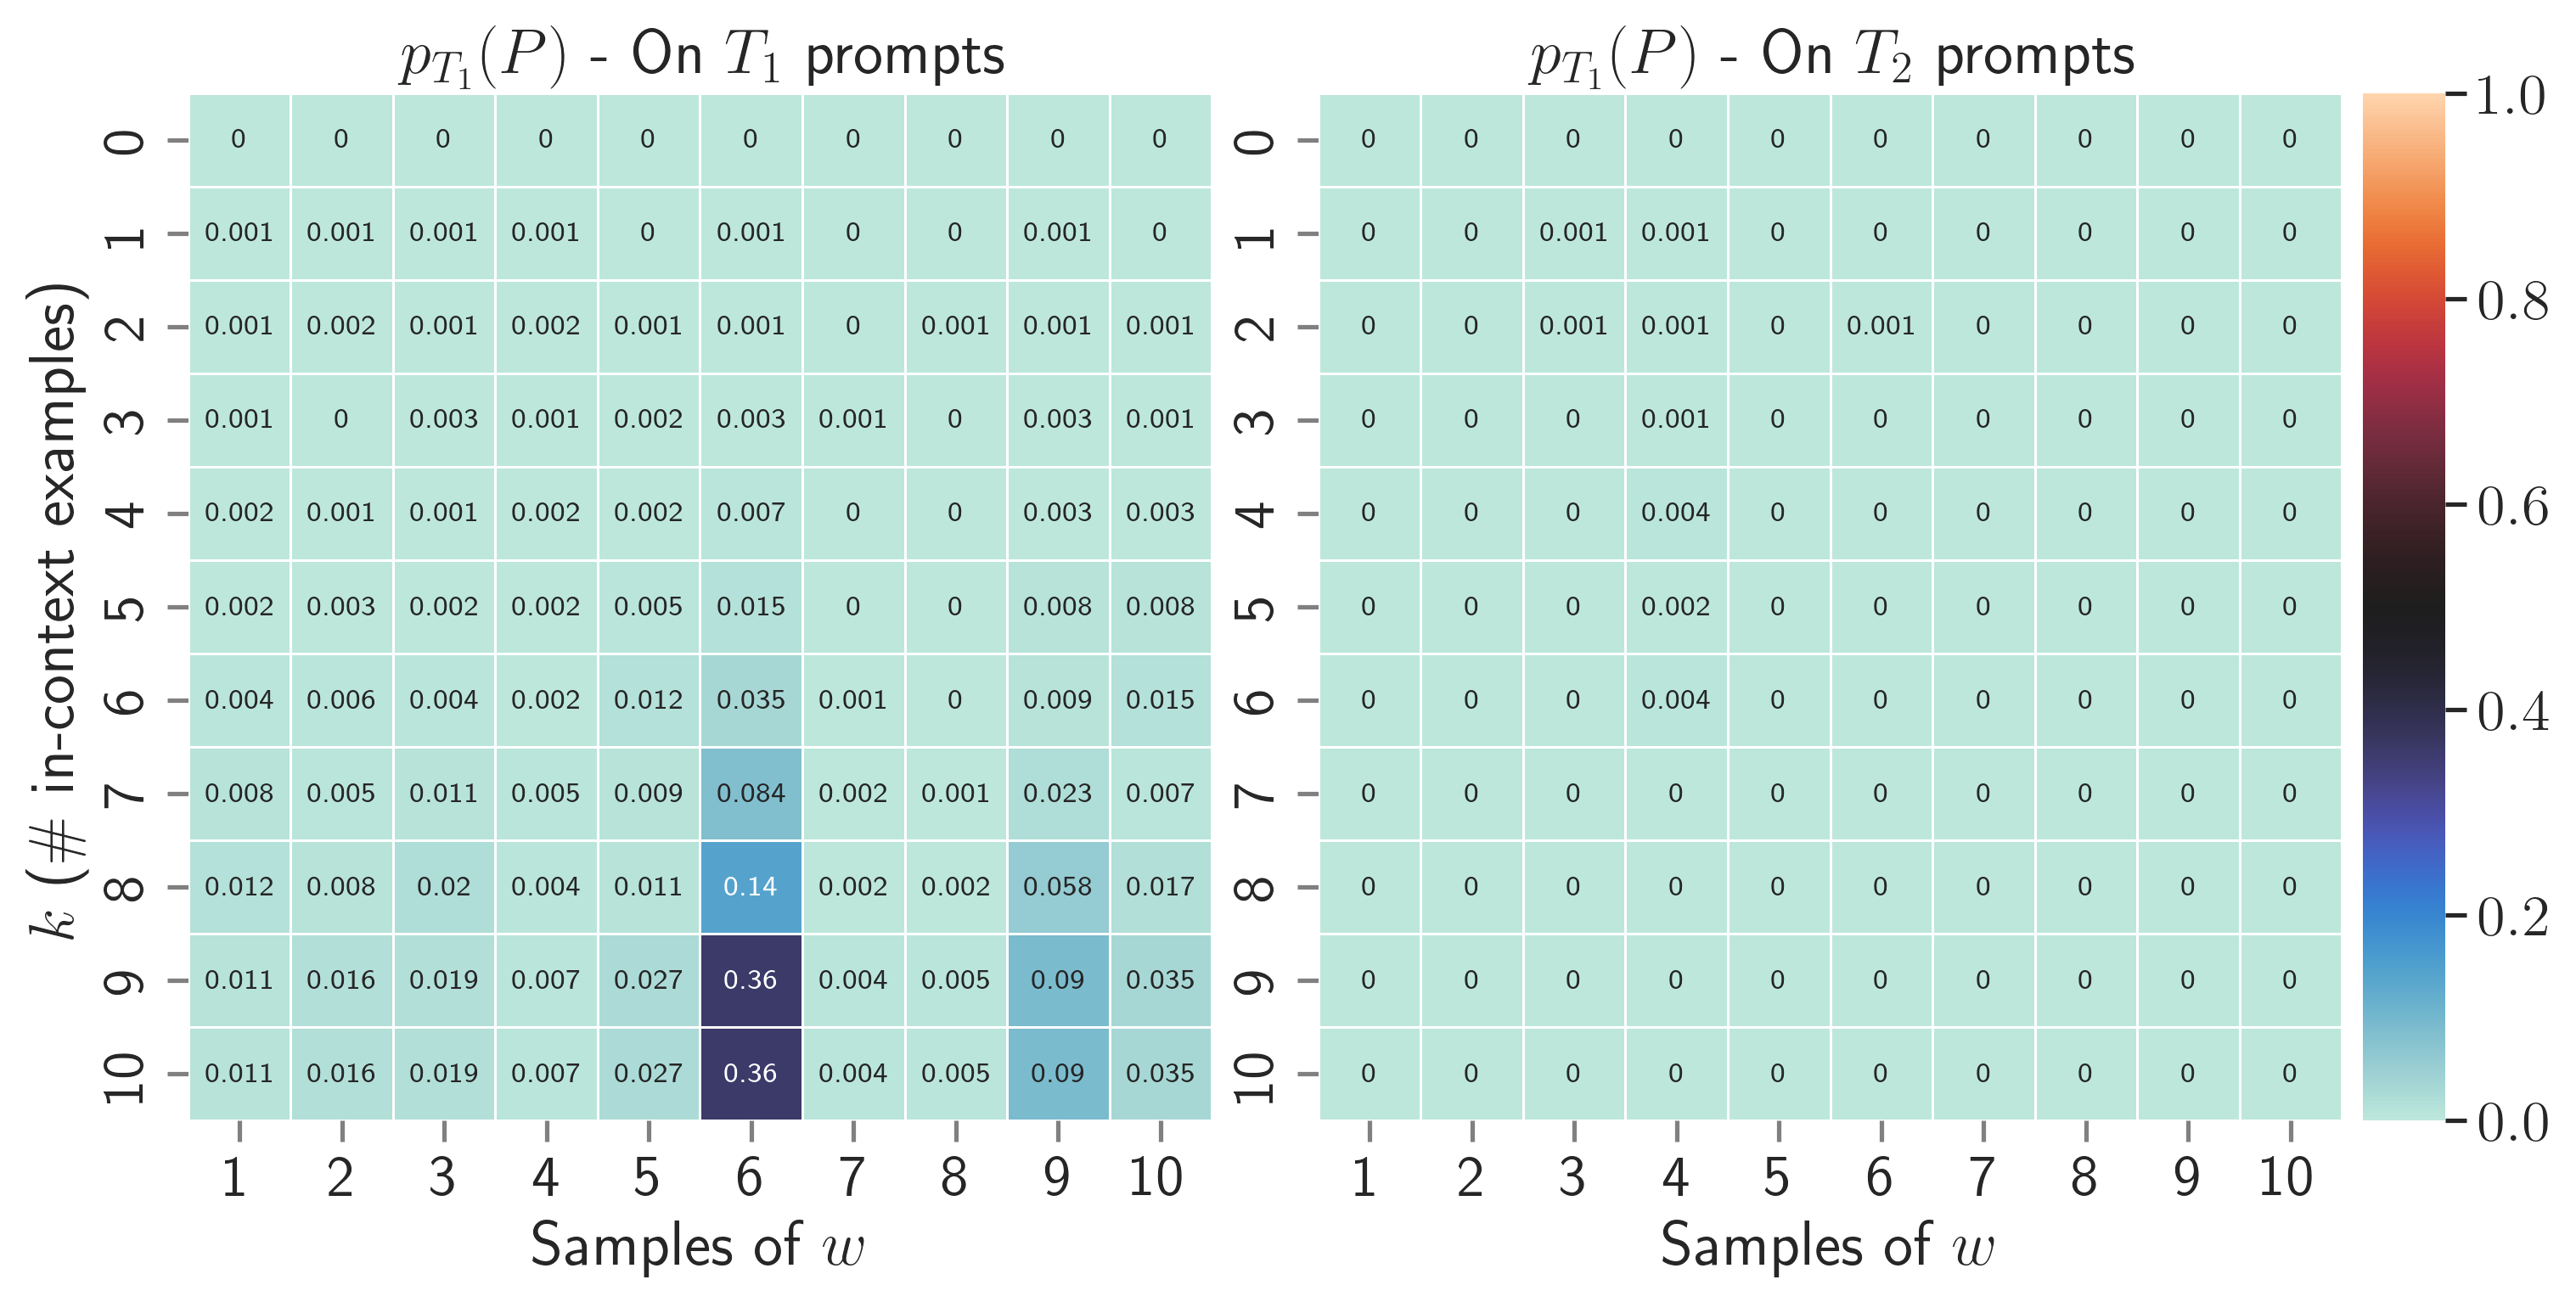

In [12]:
# ptp t1
# t1_ptp_batch_t1, t1_ptp_batch_t2
# pme_mix
# pme_mix_t1, pme_mix_t2
dict_to_pickle = {"t1_ptp_batch_t1": t1_ptp_batch_t1,
    "t1_ptp_batch_t2": t1_ptp_batch_t2,}
sns_plot_evolution_heatmap(xs,
                           cbar_lims = [0, 1],
                           plot_tsr_1=t1_ptp_batch_t1, 
                           plot_tsr_2=t1_ptp_batch_t2,
                           title_plot_1="$p_{T_1}(P)$ - On $T_1$ prompts",
                           title_plot_2="$p_{T_1}(P)$ - On $T_2$ prompts",
                           plot_suffix = "evln_ptp_t1",
                           save_filename=save_filename,
                           dict_to_pickle=dict_to_pickle,
                           annot=[True, True],
                          annot_sizes=[8,8])

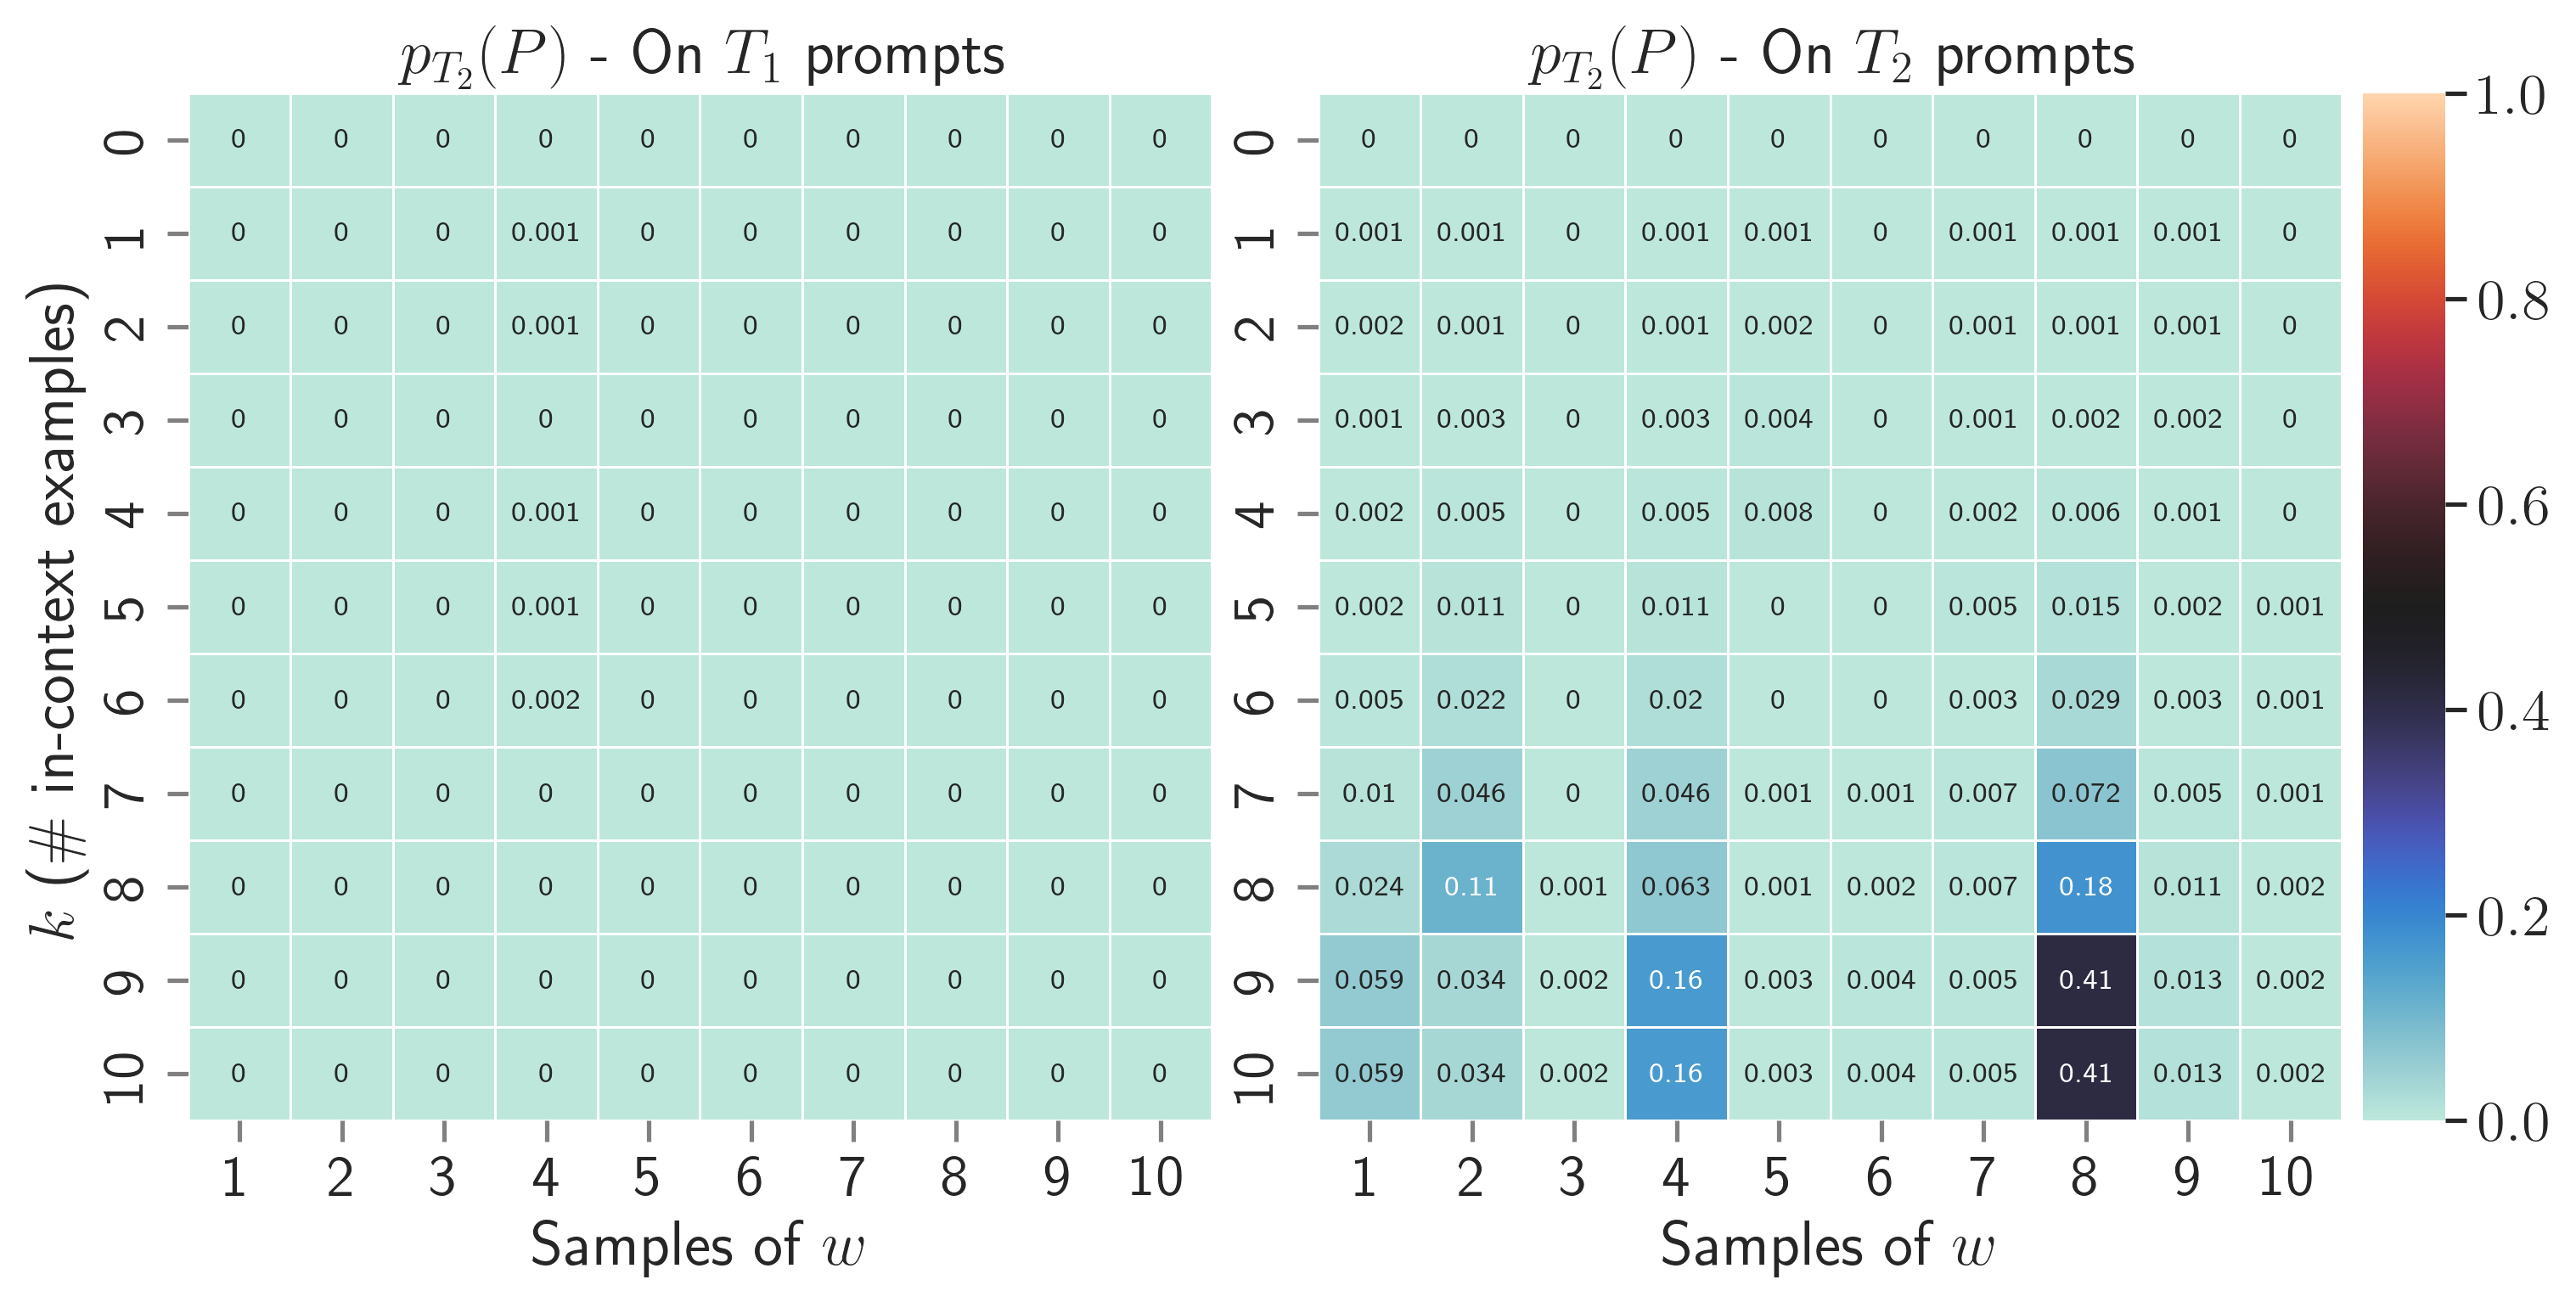

In [13]:
# ptp t2
# t2_ptp_batch_t1, t2_ptp_batch_t2
dict_to_pickle = {"t2_ptp_batch_t1": t2_ptp_batch_t1,
    "t2_ptp_batch_t2": t2_ptp_batch_t2,}
sns_plot_evolution_heatmap(xs,
                           cbar_lims = [0, 1],
                           plot_tsr_1=t2_ptp_batch_t1, 
                           plot_tsr_2=t2_ptp_batch_t2,
                           title_plot_1="$p_{T_2}(P)$ - On $T_1$ prompts",
                           title_plot_2="$p_{T_2}(P)$ - On $T_2$ prompts",
                           plot_suffix = "evln_ptp_t2",
                           save_filename=save_filename,
                           dict_to_pickle=dict_to_pickle,
                           annot=[True, True],
                          annot_sizes=[8,8])

# Plot 2

#### MSE between the probed weights of the Transformer and PMEs

In [14]:
def sqe(w1, w2):
    # inputs: batch, [pts, 1], dim
    # to return batch, pts -- mean in dim axis
    return ((w2 - w1)**2).mean(axis=-1)

def flip_last_two(arr):
    return np.transpose(arr, axes=(0, 2, 1))

In [15]:
_, w_probed_tsr_t1, _, _ = get_probed_weights_errors_cos_sim_v2(conf, 
 n_points=n_points, 
 mixing_ratio_for_dist_selection=1, batch_size=bsz,
is_sample_new_xyw=False, use_xyw=(xs, ys_t1, w_b_t1))
w_probe_t1 = w_probed_tsr_t1.cpu().detach().numpy()


_, w_probed_tsr_t2, _, _ = get_probed_weights_errors_cos_sim_v2(conf, 
 n_points=n_points, 
 mixing_ratio_for_dist_selection=0, batch_size=bsz,
is_sample_new_xyw=False, use_xyw=(xs, ys_t2, w_b_t2))
w_probe_t2 = w_probed_tsr_t2.cpu().detach().numpy()

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
# TF, gold
# TF, PME GMM
# TF, PME T1
# TF, PME T2
# PME T1, PME GMM
# PME T2, PME GMM

# TF -- w_probe_t1, w_probe_t2
# gold -- w_b_t1, w_b_t2
# PME T1 -- pme_t1_t1, pme_t1_t2
# PME T2 -- pme_t2_t1, pme_t2_t2
# PME GMM -- pme_mix_t1, pme_mix_t2

In [16]:
w_b_t1_np = w_b_t1.cpu().detach().numpy()
w_b_t2_np = w_b_t2.cpu().detach().numpy()

w_probe_t1_flp = flip_last_two(w_probe_t1)
w_probe_t2_flp = flip_last_two(w_probe_t2)
w_b_t1_np_flp = flip_last_two(w_b_t1_np)
w_b_t2_np_flp = flip_last_two(w_b_t2_np)

print(w_probe_t1_flp.shape)
print(w_b_t1_np_flp.shape)
print(pme_t1_t1.shape)
print(pme_t2_t1.shape)
print(pme_mix_t1.shape)
print()
print(w_probe_t2_flp.shape)
print(w_b_t2_np_flp.shape)
print(pme_t1_t2.shape)
print(pme_t2_t2.shape)
print(pme_mix_t2.shape)

(1280, 11, 10)
(1280, 1, 10)
(1280, 11, 10)
(1280, 11, 10)
(1280, 11, 10)

(1280, 11, 10)
(1280, 1, 10)
(1280, 11, 10)
(1280, 11, 10)
(1280, 11, 10)


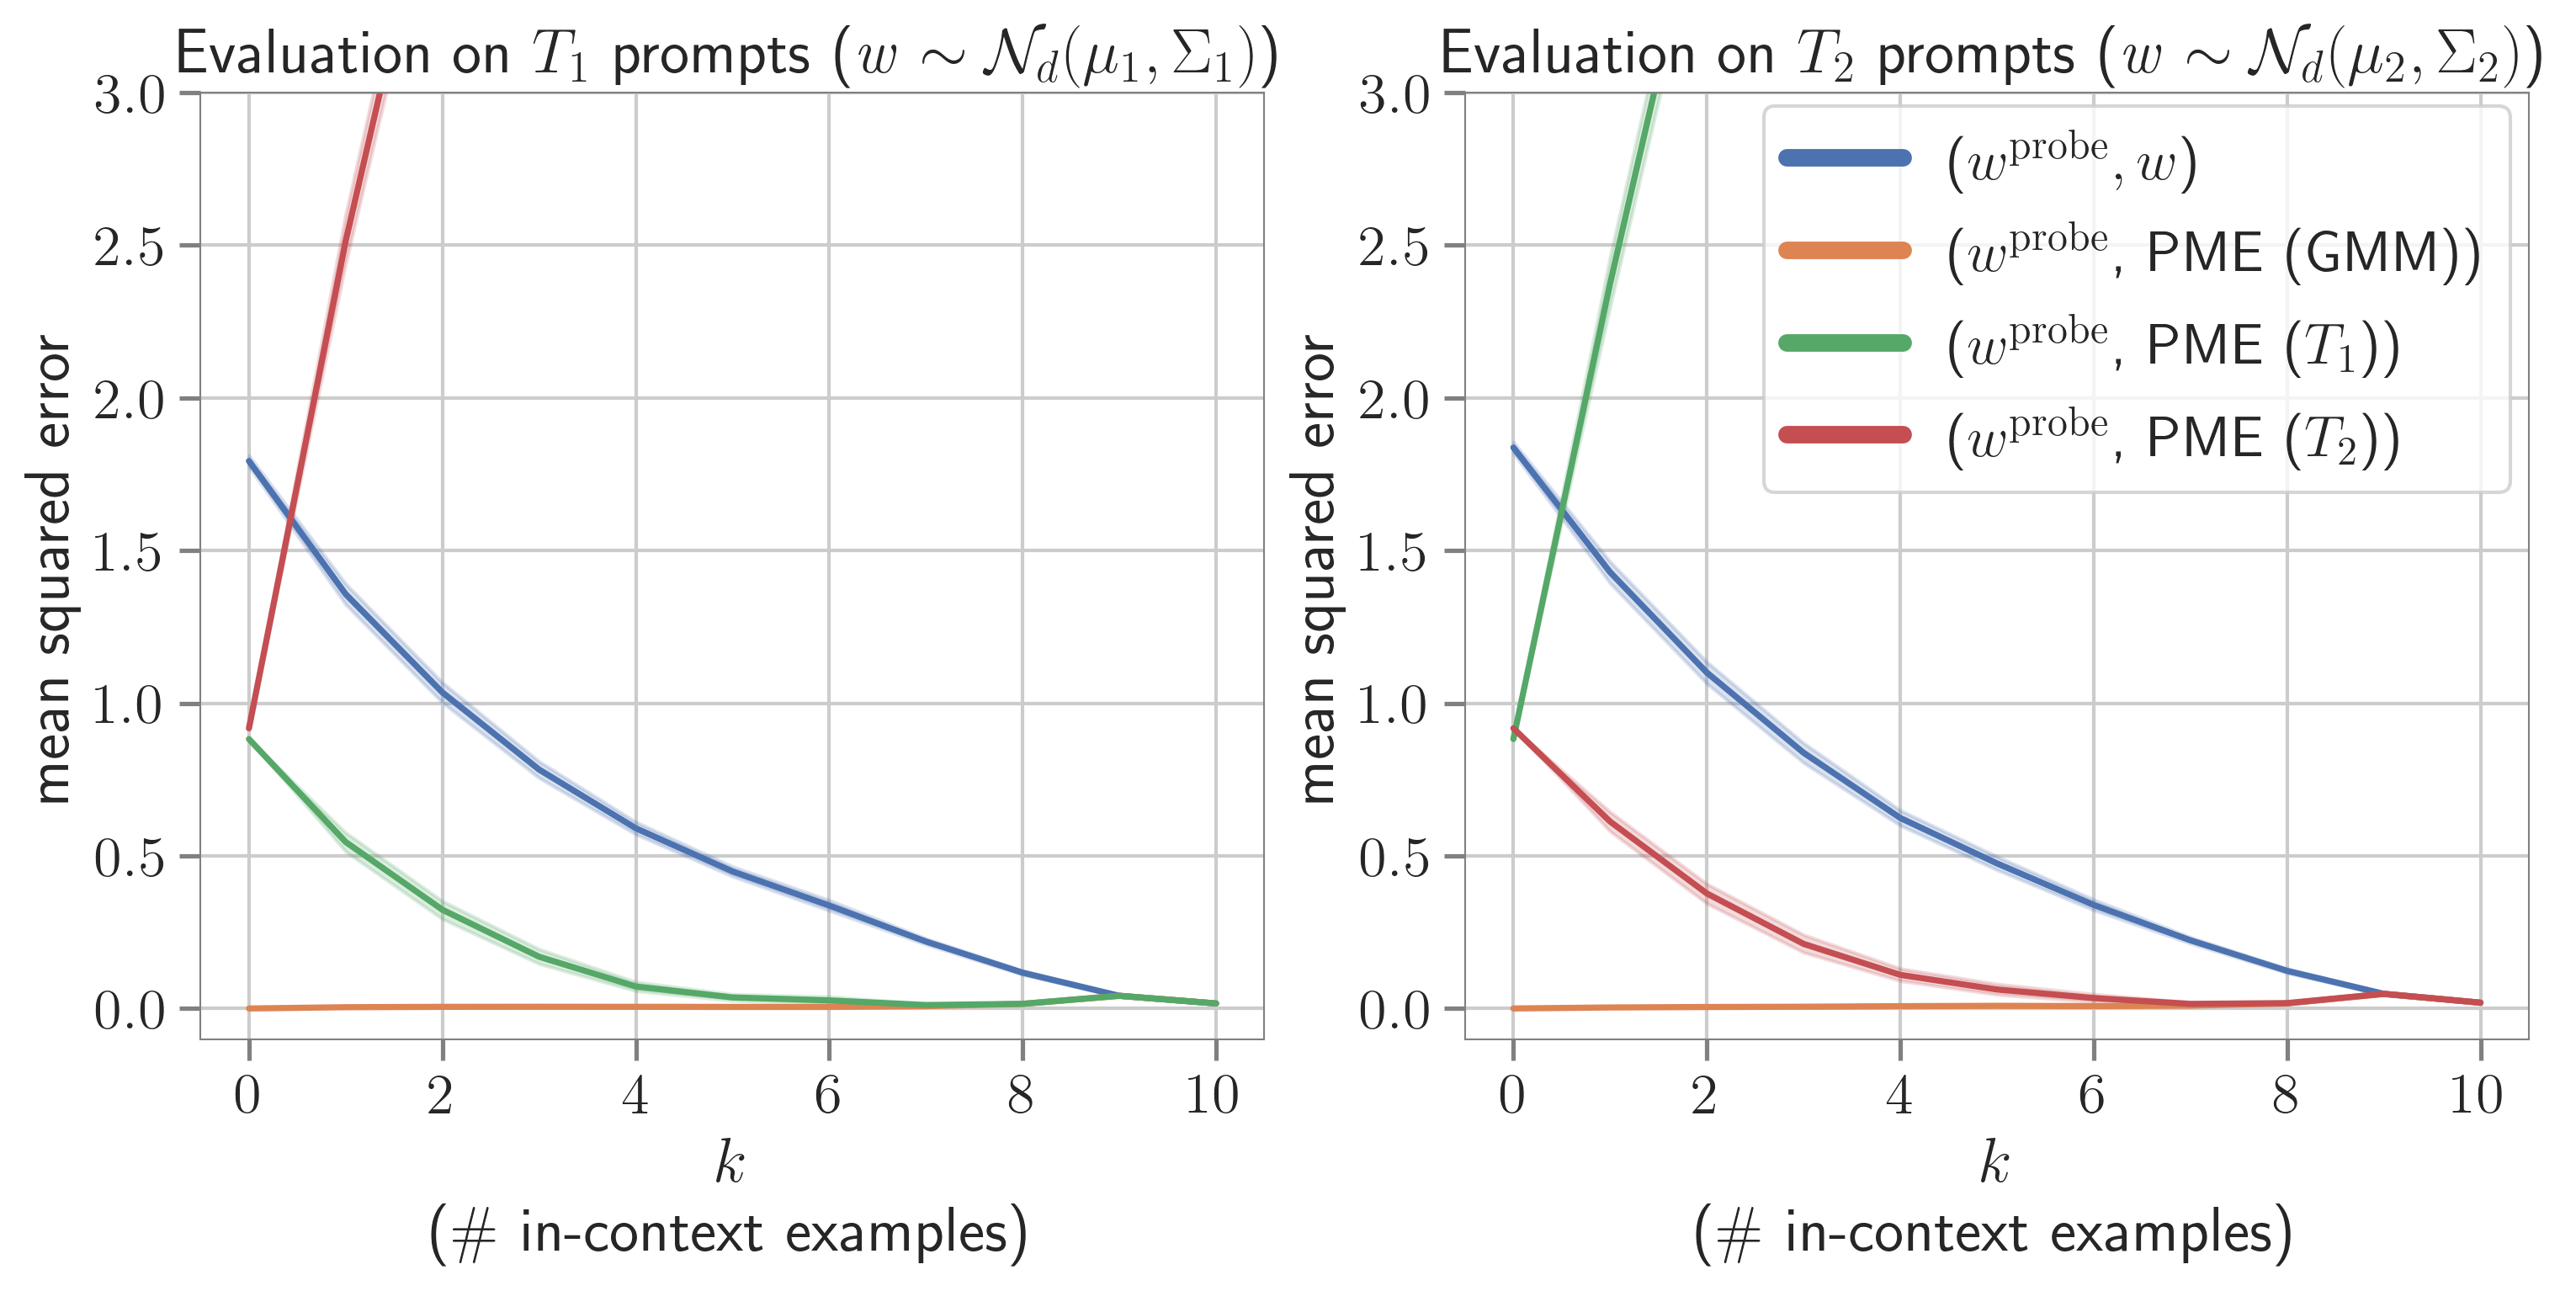

In [17]:
sns.set(style = "whitegrid", font_scale=1.5)
n_points=xs.shape[1]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5), constrained_layout=True)

lineplot_with_ci(sqe(w_probe_t1_flp, w_b_t1_np_flp) , n_points, offset = 0, label="($w^\mathrm{probe}, w$)", ax=ax1, seed=seed, linewidth=1.75)
lineplot_with_ci(sqe(w_probe_t1_flp, pme_mix_t1)  , n_points, offset = 0, label="($w^\mathrm{probe}$, PME (GMM))", ax=ax1, seed=seed, linewidth=1.75)
lineplot_with_ci(sqe(w_probe_t1_flp, pme_t1_t1)  , n_points, offset = 0, label="($w^\mathrm{probe}$, PME ($T_1$))", ax=ax1, seed=seed, linewidth=1.75)
lineplot_with_ci(sqe(w_probe_t1_flp, pme_t2_t1)  , n_points, offset = 0, label="($w^\mathrm{probe}$, PME ($T_2$))", ax=ax1, seed=seed, linewidth=1.75)
# lineplot_with_ci(sqe(pme_t1_t1, pme_mix_t1)  , n_points, offset = 0, label="(PME (T1), PME (GMM))", ax=ax1, seed=seed)
# lineplot_with_ci(sqe(pme_t2_t1, pme_mix_t1)  , n_points, offset = 0, label="(PME (T2), PME (GMM))", ax=ax1, seed=seed)

# lineplot_with_ci(l2_norm_errors, n_points, label="L-2 Norm Min", ax=ax, seed=seed)
ax1.set_xlabel("$k$\n(\# in-context examples)")
ax1.set_ylabel("mean squared error")
ax1.set_title("Evaluation on $T_1$ prompts ($\mathbf{\mathit{w}} \sim \mathcal{N}_{d}(\mu_1, \Sigma_1)$)")
# ax1.axvline(lr_bound, ls="--", color="black")
# ax1.annotate('Bound', xy=(lr_bound + 0.25, 0.5), color='r', rotation=0)
format_axes(ax1)


lineplot_with_ci(sqe(w_probe_t2_flp, w_b_t2_np_flp) , n_points, offset = 0, label="($w^\mathrm{probe}, w$)", ax=ax2, seed=seed, linewidth=1.75)
lineplot_with_ci(sqe(w_probe_t2_flp, pme_mix_t2)  , n_points, offset = 0, label="($w^\mathrm{probe}$, PME (GMM))", ax=ax2, seed=seed, linewidth=1.75)
lineplot_with_ci(sqe(w_probe_t2_flp, pme_t1_t2)  , n_points, offset = 0, label="($w^\mathrm{probe}$, PME ($T_1$))", ax=ax2, seed=seed, linewidth=1.75)
lineplot_with_ci(sqe(w_probe_t2_flp, pme_t2_t2)  , n_points, offset = 0, label="($w^\mathrm{probe}$, PME ($T_2$))", ax=ax2, seed=seed, linewidth=1.75)
# lineplot_with_ci(sqe(pme_t1_t2, pme_mix_t2)  , n_points, offset = 0, label="(PME (T1), PME (GMM))", ax=ax2, seed=seed)
# lineplot_with_ci(sqe(pme_t2_t2, pme_mix_t2)  , n_points, offset = 0, label="(PME (T2), PME (GMM))", ax=ax2, seed=seed)

ax2.set_xlabel("$k$\n(\# in-context examples)")
ax2.set_ylabel("mean squared error")
ax2.set_title("Evaluation on $T_2$ prompts ($\mathbf{\mathit{w}} \sim \mathcal{N}_{d}(\mu_2, \Sigma_2)$)")
# ax2.axvline(sr_bound, ls="--", color="black")
# ax2.annotate('Bound', xy=(sr_bound + 0.25, 0.5), color='r', rotation=0)
format_axes(ax2)

ax1.set_ylim([-0.1, 3])
ax2.set_ylim([-0.1, 3])

# ax1.set_ylim([-0.1, 40])
# ax2.set_ylim([-0.1, 40])

# ax1.ylim(-0.1,1.5)
# ax2.ylim(-0.1,1.5)
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

# plt.axhline(baseline, ls="--", color="gray", label="zero estimator")

handles, labels = ax1.get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.95))
# leg = plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
for line in leg.get_lines():
    line.set_linewidth(5)
    
plot_suffix = "probe_mse"
plt.savefig(f"final_plots/{save_filename}_{plot_suffix}.pdf", dpi = 300, bbox_inches = "tight")

dict_to_pickle = {"w_probe_t1_flp": w_probe_t1_flp,
"w_b_t1_np_flp": w_b_t1_np_flp,
"pme_t1_t1": pme_t1_t1,
"pme_t2_t1": pme_t2_t1,
"pme_mix_t1": pme_mix_t1,
"w_probe_t2_flp":  w_probe_t2_flp,
"w_b_t2_np_flp":  w_b_t2_np_flp,
"pme_t1_t2": pme_t1_t2,
"pme_t2_t2": pme_t2_t2,
"pme_mix_t2": pme_mix_t2,}
do_pickle_plot(f"{save_filename}_{plot_suffix}", dict_to_pickle)

plt.show()

# Plot 3

#### First coordinate of the probed weights of the transformer across the prompt length for prompts from both $T_1$ and $T_2$

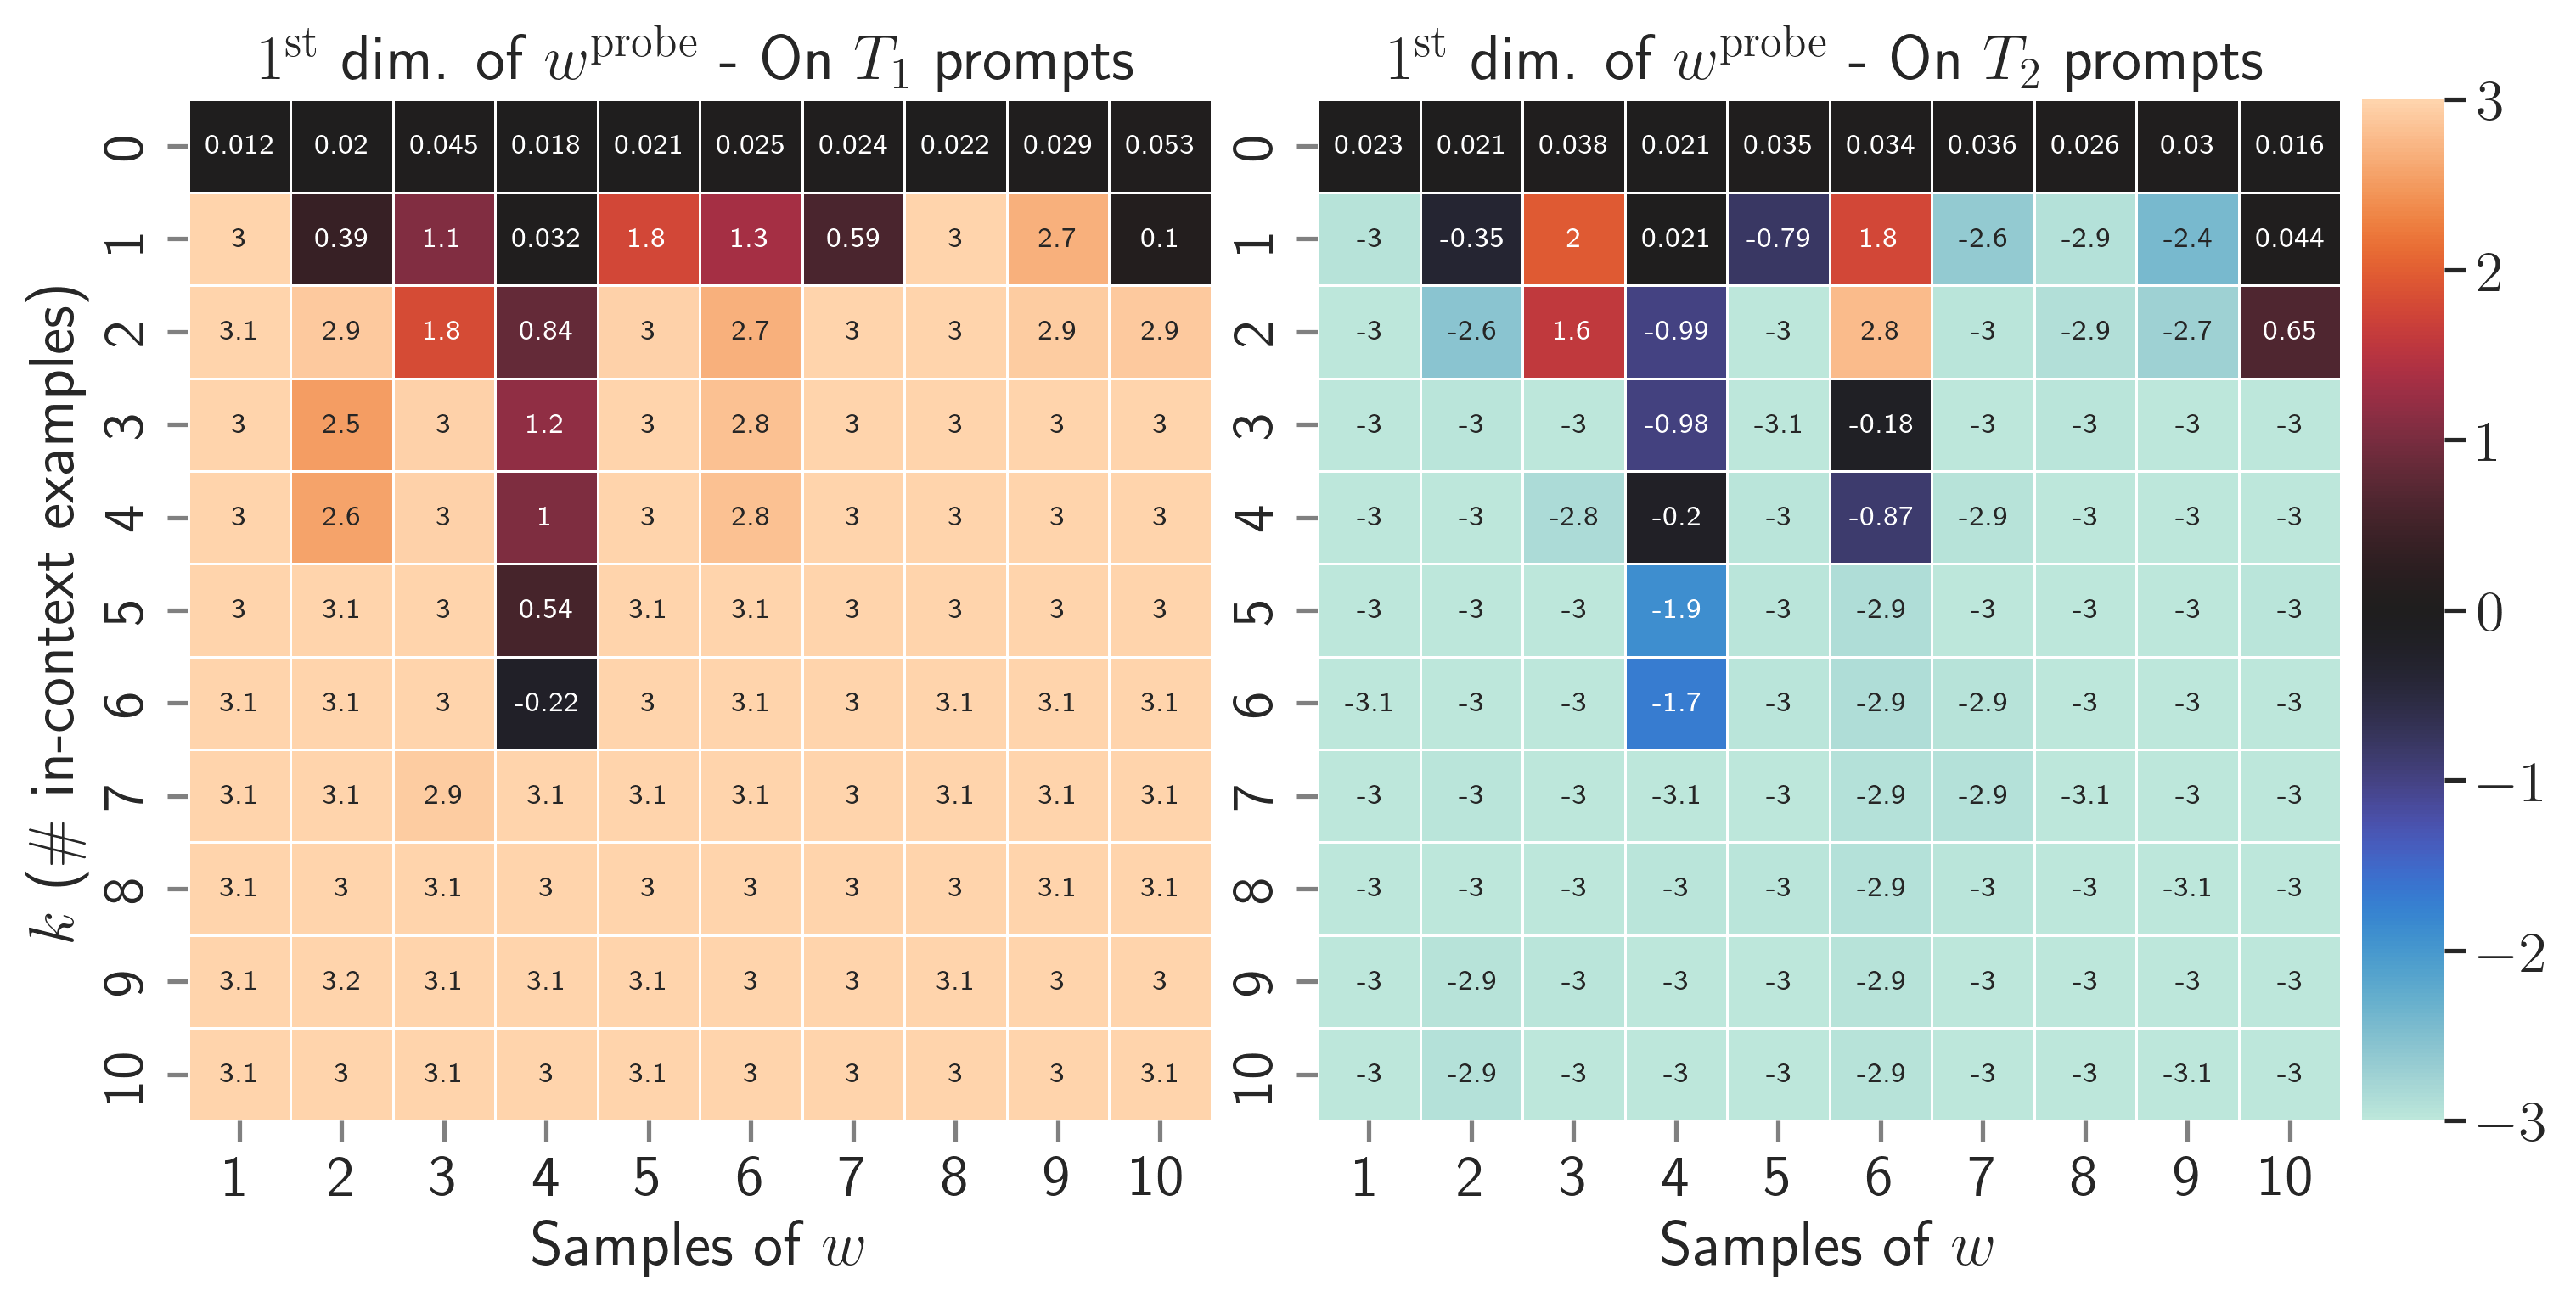

In [18]:
# w_probe_t*_flp
# w_probe_t1_flp, w_probe_t2_flp
batch_skip=0
dict_to_pickle = {"w_probe_t1_flp": w_probe_t1_flp,
    "w_probe_t2_flp": w_probe_t2_flp,}
sns_plot_evolution_heatmap(xs,
                           cbar_lims = [-3, 3],
                           plot_tsr_1=w_probe_t1_flp[batch_skip:,:,0], 
                           plot_tsr_2=w_probe_t2_flp[batch_skip:,:,0],
                           title_plot_1="$1^\mathrm{st}$ dim. of $w^\mathrm{probe}$ - On $T_1$ prompts",
                           title_plot_2="$1^\mathrm{st}$ dim. of $w^\mathrm{probe}$ - On $T_2$ prompts",
                           plot_suffix = "evln_w_probe",
                           save_filename=save_filename,
                           dict_to_pickle=dict_to_pickle,
                          annot=[True, True],
                          annot_sizes=[8,8])

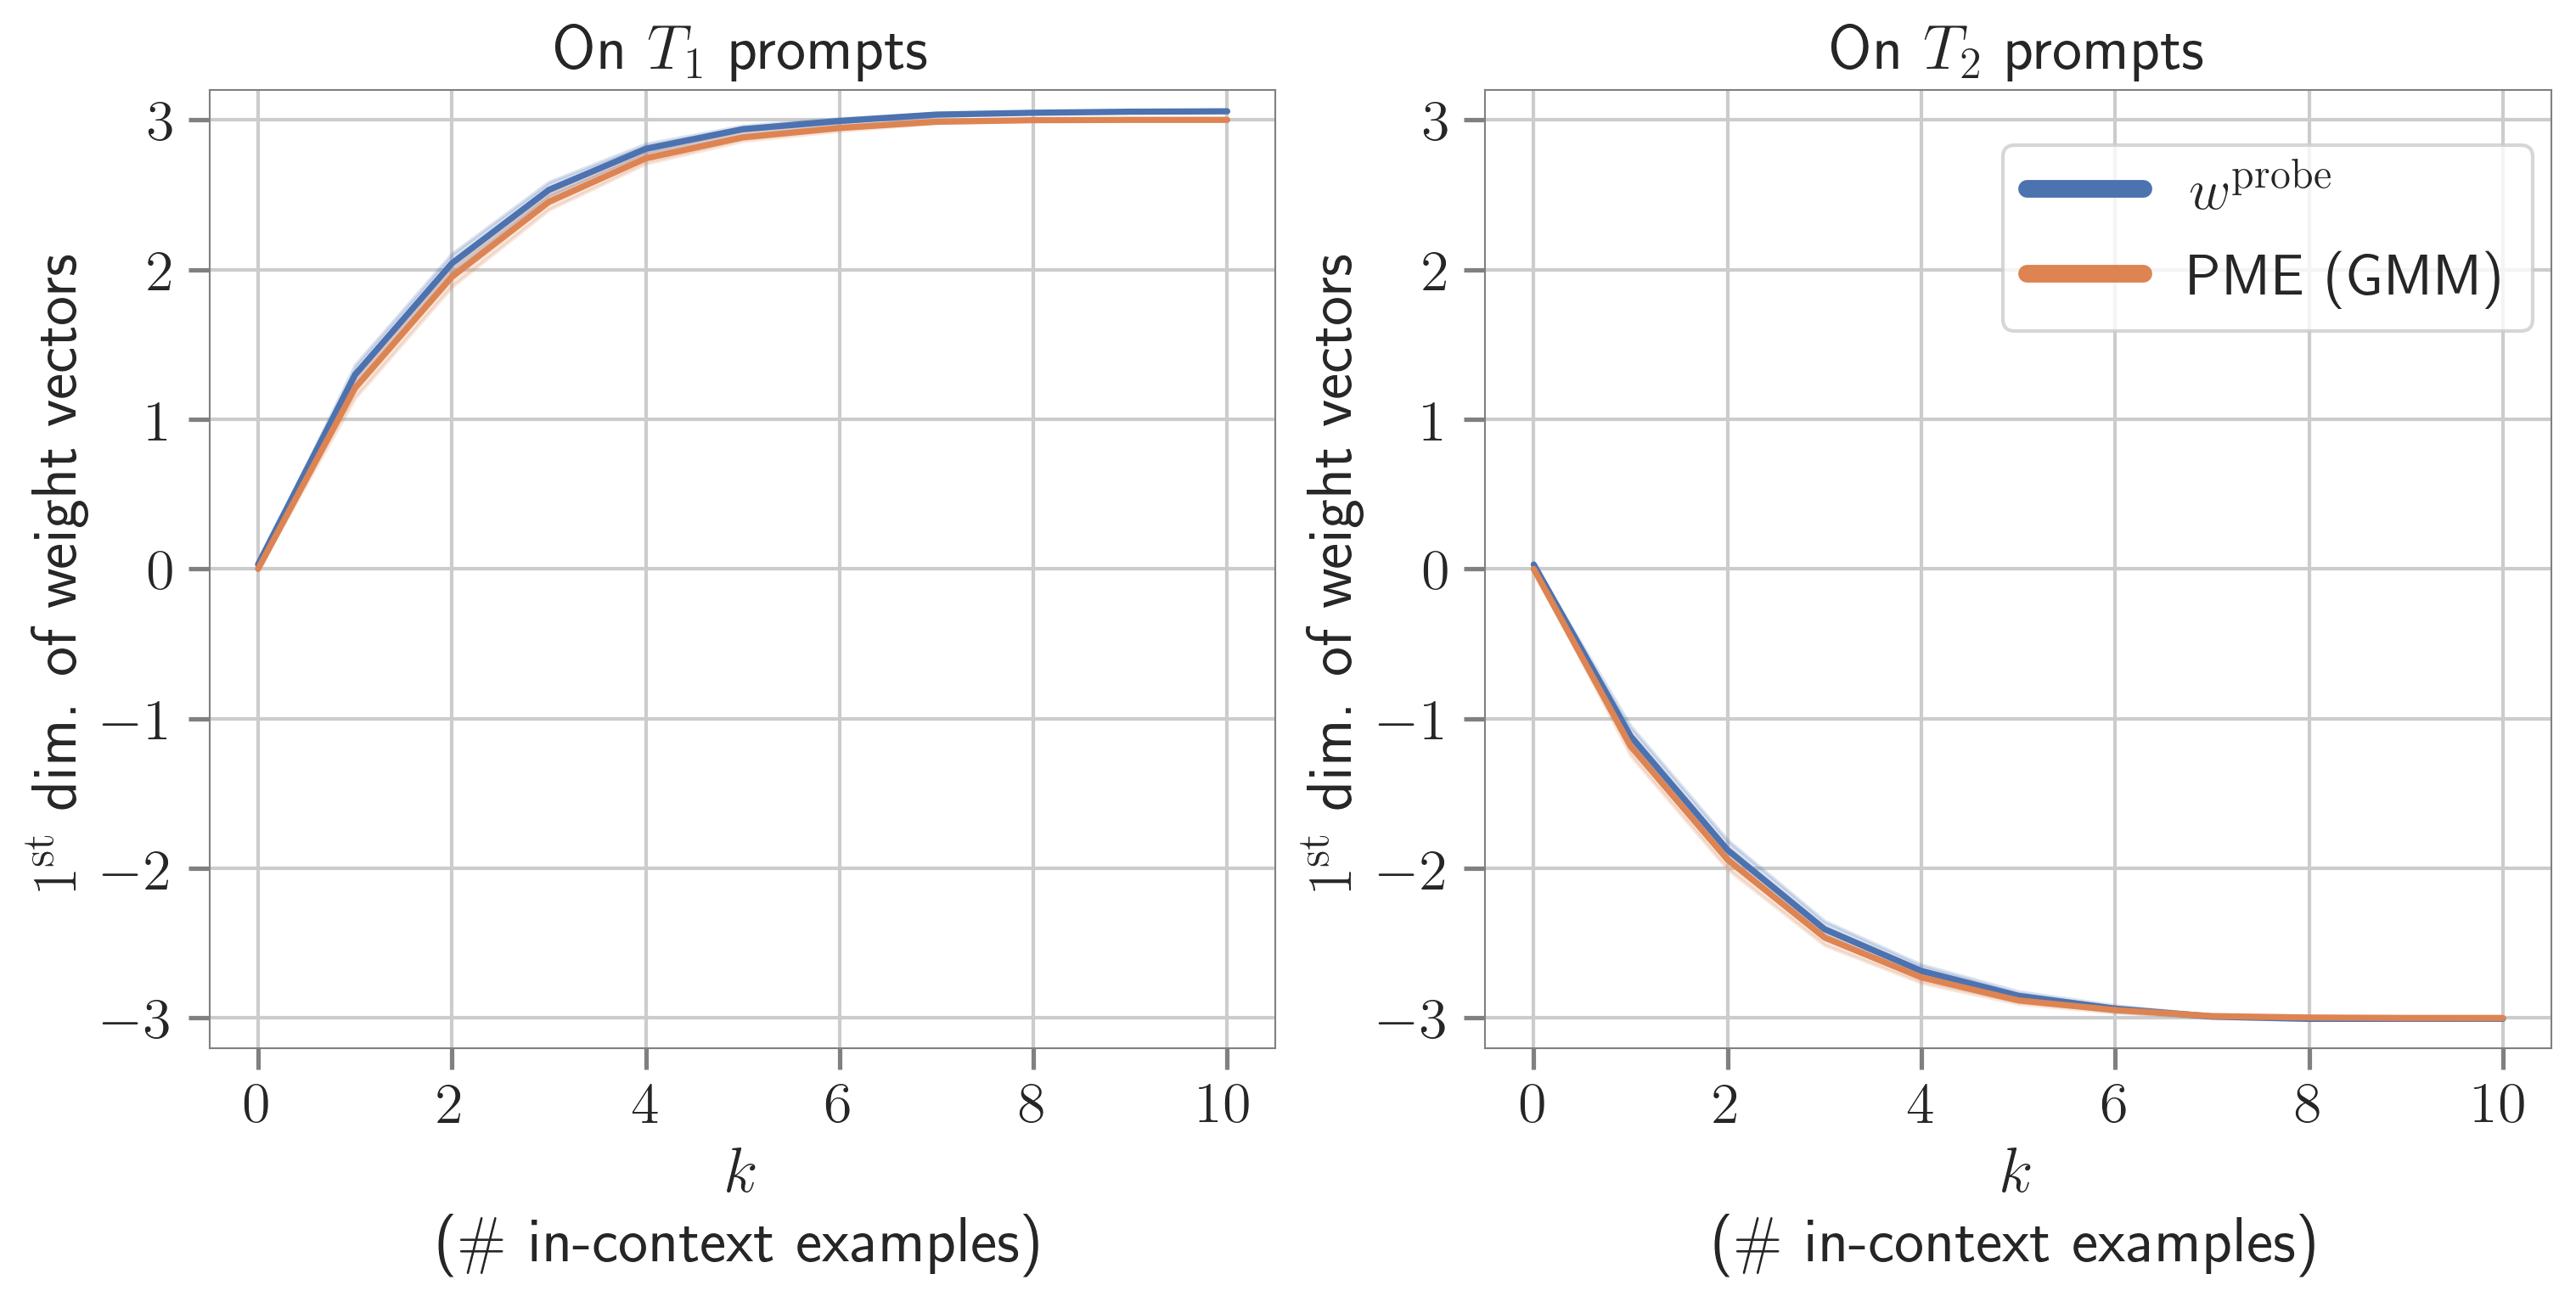

In [19]:
# Lineplot w_probe and PME Mix

dict_to_pickle = {"w_probe_t1_flp": w_probe_t1_flp,
    "w_probe_t2_flp": w_probe_t2_flp,
    "pme_mix_t1": pme_mix_t1,
    "pme_mix_t2": pme_mix_t2,}

sns_lineplot_paper_evolution(xs, 
                   n_dims, 
                   
                   plot_tsr = {
                       # On T1 prompts
                       "ax1": [(w_probe_t1_flp[:,:,0], "$w^\mathrm{probe}$"),
                                (pme_mix_t1[:,:,0], "PME (GMM)")],
                        "ax2": [(w_probe_t2_flp[:,:,0], "$w^\mathrm{probe}$"),
                                (pme_mix_t2[:,:,0], "PME (GMM)")]
                   },
                   plot_suffix = "evln_wts_probe_lineplot",
                   save_filename=save_filename,
                   dict_to_pickle=dict_to_pickle,
                    ylabel="$1^\mathrm{st}$ dim. of weight vectors",
                    ylim_ax=(-3.2, 3.2),
                    legend_pos=(1.0, 0.92))

## Plot 4

#### First coordinate of the probed weights of the transformer and PME (GMM) across the prompt length for a specially constructed prompt that reveals no information about true $w$

In [20]:
def update_xyw_method(xs, ys, w_b):
    xs[:,:,0]=0.
    ys_new = (xs@w_b).squeeze(dim=-1)
    return xs, ys_new, w_b

# xs, ys, w_b, w_probed_tsr, error_prompt_len, cos_sim_prompt_len
xs_special, ys_special, w_b, w_probed_tsr_no_hint, _, _ = get_probed_weights_errors_cos_sim_v2(conf, 
 n_points=n_points, 
 mixing_ratio_for_dist_selection=1, 
 update_xyw_method=update_xyw_method,
 is_get_xyw=True, batch_size=bsz)
# shapes: (batch, n_dims);  (batch, n_dim, prompt len);  (batch, prompt len);  (batch, prompt len)

w_probed_tsr_no_hint.shape

  0%|          | 0/11 [00:00<?, ?it/s]

torch.Size([1280, 10, 11])

In [21]:
# xs_special, ys_special

prompts_from_component="special"

pme_t1, t1_errors_batch_no_mean, t1_preds_batch_no_mean, t1_ptp_batch = compute_PME_and_pTP_non_T_prompt(
    computing_for_component="mean_plus_one", xs=xs_special, ys=ys_special, prompts_from_component=prompts_from_component)

pme_t2, t2_errors_batch_no_mean, t2_preds_batch_no_mean, t2_ptp_batch = compute_PME_and_pTP_non_T_prompt(
    computing_for_component="mean_minus_one", xs=xs_special, ys=ys_special, prompts_from_component=prompts_from_component)

beta1_special, beta2_special, pme_mix_special = get_betas_and_PME_mix(t1_ptp_batch, t2_ptp_batch, pme_t1, pme_t2, alpha1=alpha1, alpha2=alpha2)

# pmix_preds_batch_no_mean, pmix_errors_batch_no_mean = get_pme_mix_preds_and_errors(pme_mix_special, xs_special, ys_special)

# transformer_pred, transformer_loss_no_mean = get_TF_preds(model, xs, ys_t1, task_t1, from_index=0)

# transformer_loss_no_mean_special = transformer_loss_no_mean
# t1_errors_batch_no_mean_special = t1_errors_batch_no_mean
# t2_errors_batch_no_mean_special = t2_errors_batch_no_mean
# pmix_errors_batch_no_mean_special = pmix_errors_batch_no_mean


  0%|          | 0/1280 [00:00<?, ?it/s]

/anaconda/envs/icl/lib/python3.8/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


  0%|          | 0/1280 [00:00<?, ?it/s]

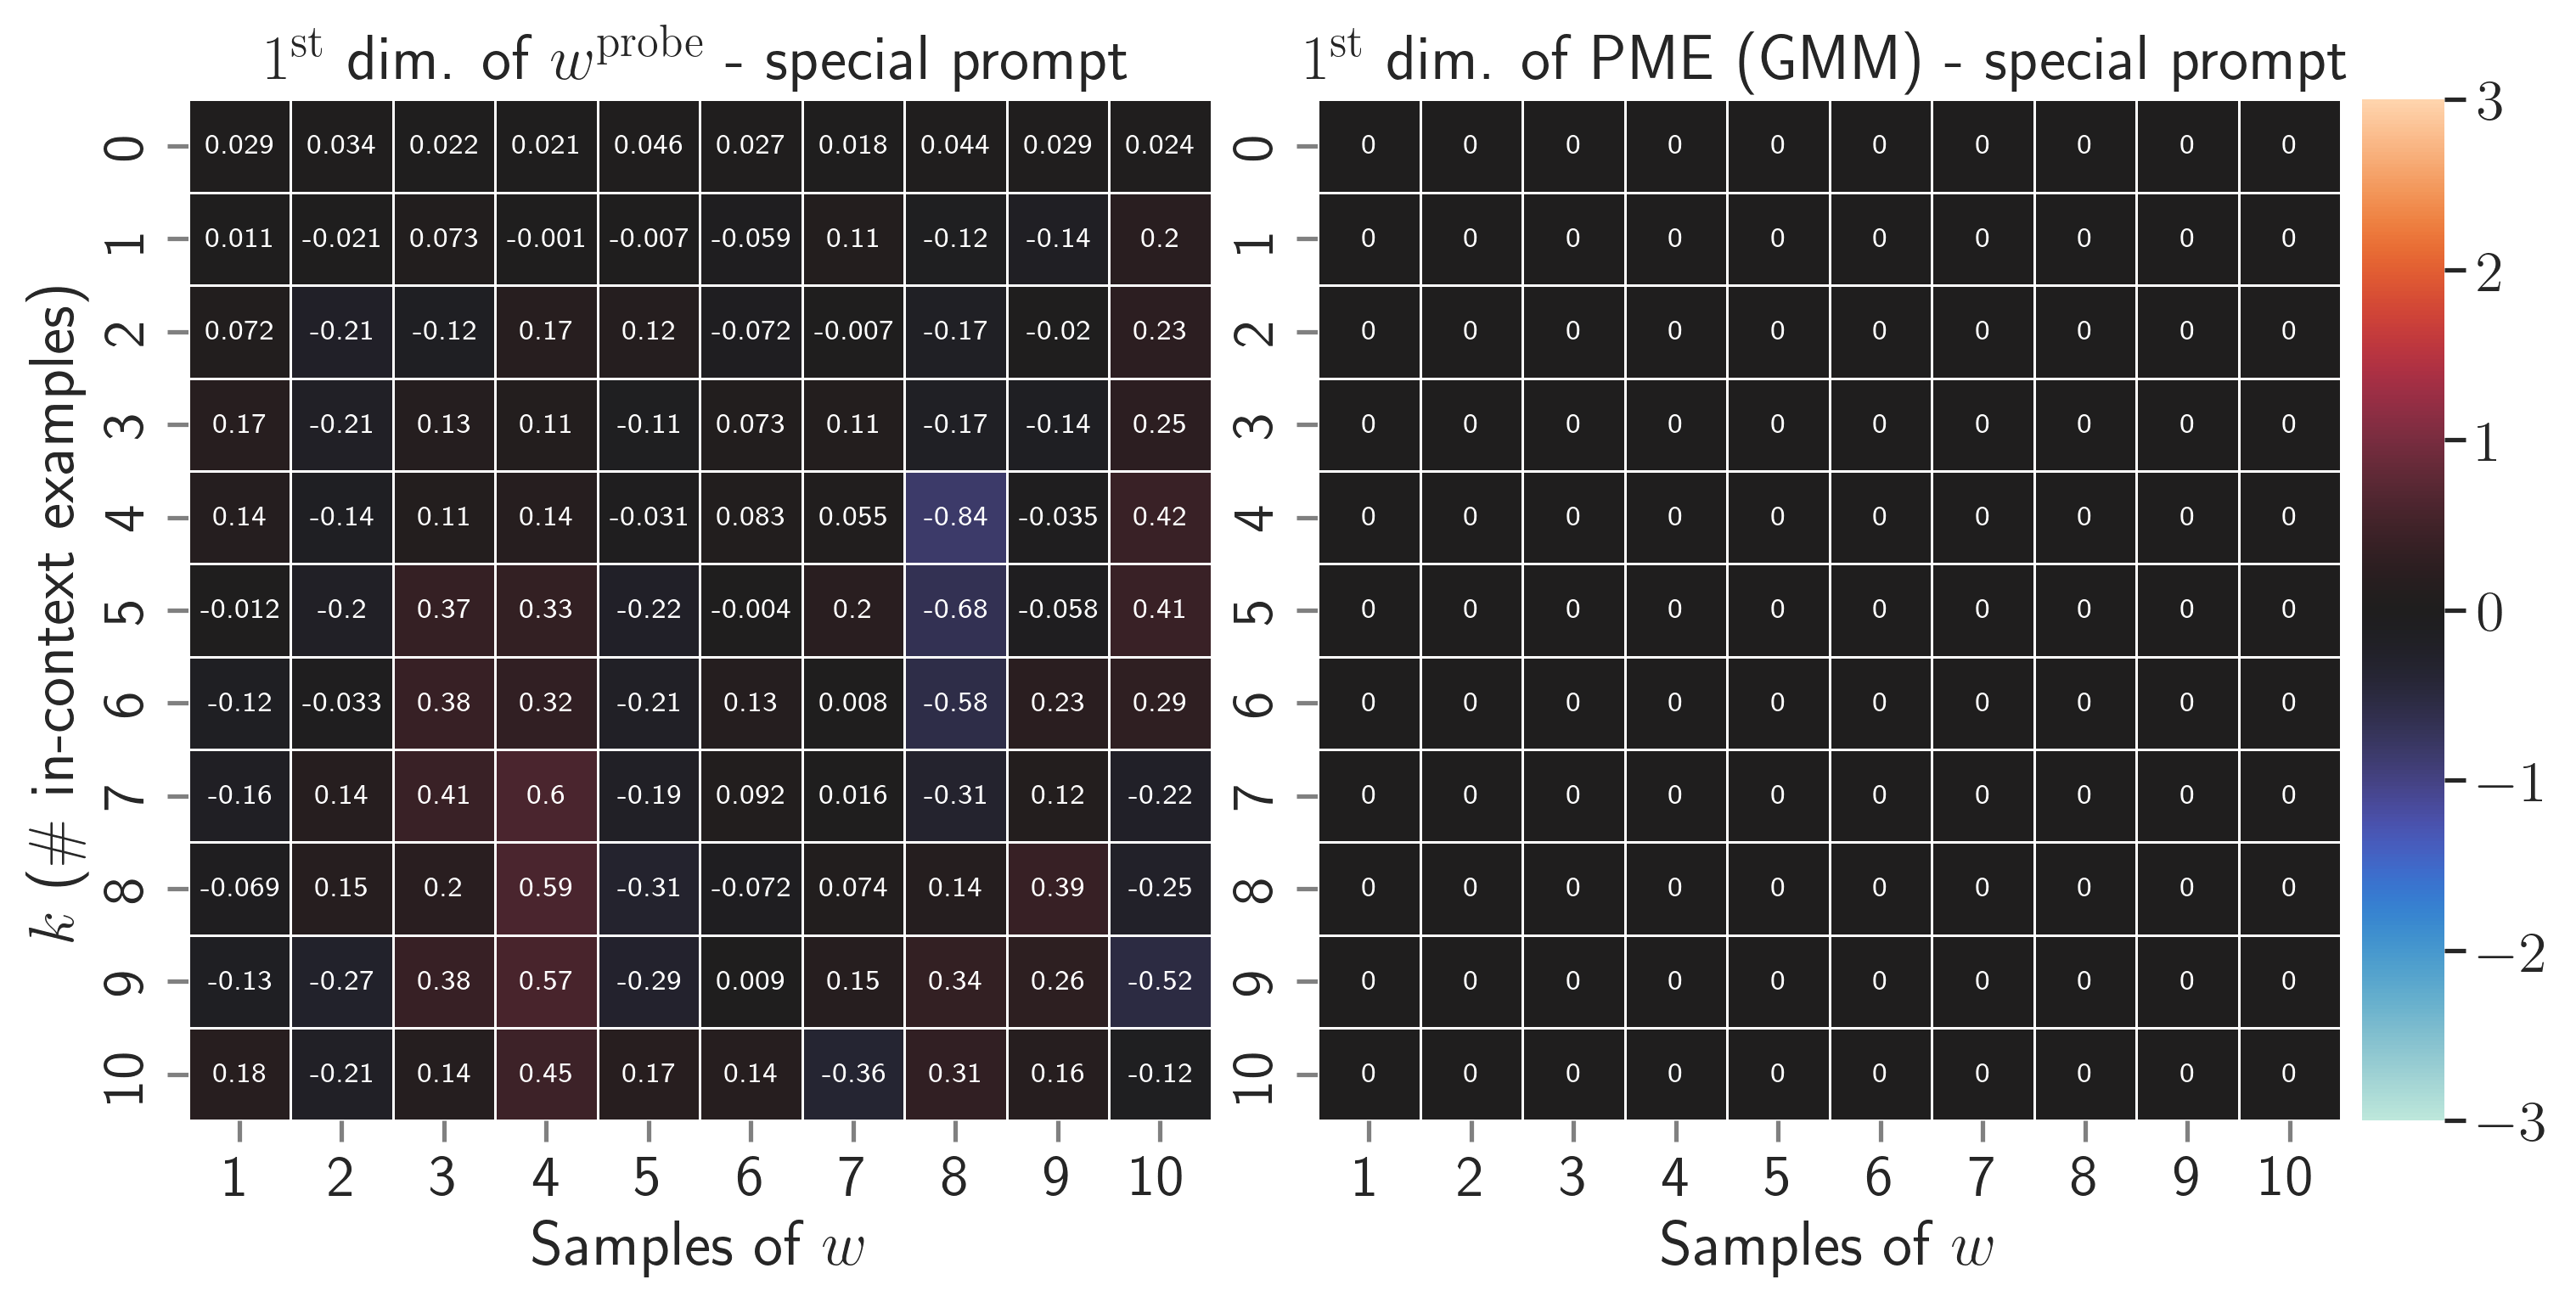

In [23]:
# pme mix vs w_probe special input
# w_probed_tsr_no_hint, pme_mix_special
dict_to_pickle = {"w_probed_tsr_no_hint": w_probed_tsr_no_hint,
    "pme_mix_special": pme_mix_special,}
batch_skip=0
sns_plot_evolution_heatmap(xs,
                           cbar_lims = [-3, 3],
                           plot_tsr_1=w_probed_tsr_no_hint[batch_skip:,0,:], 
                           plot_tsr_2=pme_mix_special[:,:,0],
                           title_plot_1="$1^\mathrm{st}$ dim. of $w^\mathrm{probe}$ - special prompt",
                           title_plot_2="$1^\mathrm{st}$ dim. of PME (GMM) - special prompt",
                           plot_suffix = "pmix_w_probe_no_hint",
                           save_filename=save_filename,
                           dict_to_pickle=dict_to_pickle,
                          is_numpy=[False, True],
                          annot=[True, True],
                          annot_sizes=[8,8])